In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("df_130.csv", header=None)

/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_71462/1000259226.py:1: DtypeWarning: Columns (9,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_130.csv", header=None)


In [4]:
df.columns = ['ID','SIGNID','OPD_DATE','WEEKDAY','DIVISIONID','DIVISIONABBR','SERVICEGROUPID','SERVICEGROUPABBR',
              'EXCCOMBOID','EXCCOMBOABBR','BLOCKID_TRP','BLOCK_ID_INT','BLOCK','LINEID_TRP','LINEDIRID_TRP','LINEABBR',
              'LINE_ID_INT','LINECLUSTERABBR','PATTERNID_TRP','PATTERN','PATTERN_ID_INT','DIRNUM','DIRECTION','TRIPNUM_TRP','TRIPID_TRP',
              'TRIPID_INT','TRIP_ID_INT','TRIP_CODE','TRIP_CODE1','TRIP_TYPE','EVENT_NO_TRIP','SCHED_START_TIME','SCHED_END_TIME','SCHED_TRIP_TIME',
              'ACT_START_TIME','ACT_END_TIME','ACT_TRIP_TIME','DIFF_TRIP_TIME','OTP_TRIP_TIME','SCHED_DISTANCE','ACT_DISTANCE','SCHED_SPEED','ACT_SPEED','POINT_COUNT','POINT_FIRST',
              'POINT_LAST','APC','APC_QUALITY','IS_ADDITIONAL','COMPLETENESS','VEHICLE_ID','VEHICLE','SEATS','CAPACITY','CAPACITY_MAX','DRIVER_ID','DRIVER','EVENT_NO_STOP','SEQUENCE',
              'POINT_SEQ','POINT_IDX','POINT_ID','STOPABBR','STOPNAME','STOPTYPE','POINT_ROLE','STOPCLUSTERID','NODE_SEQ','NODEID','NODEABBR','NODE_SEQ_ABBR','ETIME','SCHED_ARR_TIME','ACT_ARR_TIME',
              'SCHED_DEP_TIME','ACT_DEP_TIME','DIFF_DEP_TIME','DWELL_TIME','DOORS_OPENING','METERS','DISTANCE_TO_NEXT','DISTANCE_TO_TRIP','GPS_LATITUDE','GPS_LONGITUDE','BOARDING_ORIG',
              'ALIGHTING_ORIG','LOAD_ORIG','BOARDING_VALID','ALIGHTING_VALID','LOAD_VALID','BOARDING','ALIGHTING','LOAD','LOAD_EXTRA','WHEELCHAIR_COUNT','MISSED_TRIP','OTP_STOP','MISSED_STOP',
              'Source_ID','Pkg_Exec_GUID','CreatedDate','LastModifiedDate','CTE','POINT_IDX_C','DWELLTIME','POINT_F','POINT_L','TERMINAL','LAYOVER']

In [5]:
df.head()

,ID,SIGNID,OPD_DATE,WEEKDAY,DIVISIONID,DIVISIONABBR,SERVICEGROUPID,SERVICEGROUPABBR,EXCCOMBOID,EXCCOMBOABBR,...,Pkg_Exec_GUID,CreatedDate,LastModifiedDate,CTE,POINT_IDX_C,DWELLTIME,POINT_F,POINT_L,TERMINAL,LAYOVER
0,1869584923,130,2022-12-25,7_SUN,1,DIV7,80,7_HOLSUN01,NaN,NaN,...,6AF5541D-03F9-4018-AC47-8437B5C33A16,2023-03-07 07:45:28.103,NaN,MISSED_INT,NaN,NaN,NaN,NaN,NaN,NaN
1,1869584924,130,2022-12-25,7_SUN,1,DIV7,80,7_HOLSUN01,NaN,NaN,...,6AF5541D-03F9-4018-AC47-8437B5C33A16,2023-03-07 07:45:28.103,NaN,MISSED_INT,NaN,NaN,NaN,NaN,NaN,NaN
2,1869584925,130,2022-12-25,7_SUN,1,DIV7,80,7_HOLSUN01,NaN,NaN,...,6AF5541D-03F9-4018-AC47-8437B5C33A16,2023-03-07 07:45:28.103,NaN,MISSED_INT,NaN,NaN,NaN,NaN,NaN,NaN
3,1869584926,130,2022-12-25,7_SUN,1,DIV7,80,7_HOLSUN01,NaN,NaN,...,6AF5541D-03F9-4018-AC47-8437B5C33A16,2023-03-07 07:45:28.103,NaN,MISSED_INT,NaN,NaN,NaN,NaN,NaN,NaN
4,1869584927,130,2022-12-25,7_SUN,1,DIV7,80,7_HOLSUN01,NaN,NaN,...,6AF5541D-03F9-4018-AC47-8437B5C33A16,2023-03-07 07:45:28.103,NaN,MISSED_INT,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['BLOCK']

0        601008
1        601008
2        601008
3        601008
4        601008
          ...  
67011    601002
67012    601002
67013    601002
67014    601002
67015    601002
Name: BLOCK, Length: 67016, dtype: int64

In [6]:
df.dtypes

ID              int64
SIGNID          int64
OPD_DATE       object
WEEKDAY        object
DIVISIONID      int64
               ...   
DWELLTIME     float64
POINT_F       float64
POINT_L       float64
TERMINAL      float64
LAYOVER       float64
Length: 109, dtype: object

In [6]:
df['OPD_DATE'] = pd.to_datetime(df['OPD_DATE'], format='%Y-%m-%d')

In [7]:
print(f"OPD_DATE Range: {df['OPD_DATE'].min()} to {df['OPD_DATE'].max()}")

OPD_DATE Range: 2022-12-25 00:00:00 to 2023-01-07 00:00:00


In [126]:
#df = df.sort_values(by=['EVENT_NO_TRIP', 'SEQUENCE'])

In [8]:
df['CTE'].unique()

array(['MISSED_INT', 'PATTERN_TRIPID'], dtype=object)

In [9]:
df['POINT_IDX_C'].unique()

array([nan])

In [10]:
df['LAYOVER'].unique()

array([nan])

In [11]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['ID', 'SIGNID', 'OPD_DATE', 'WEEKDAY', 'DIVISIONID', 'DIVISIONABBR',
       'SERVICEGROUPID', 'SERVICEGROUPABBR', 'EXCCOMBOID', 'EXCCOMBOABBR',
       ...
       'Pkg_Exec_GUID', 'CreatedDate', 'LastModifiedDate', 'CTE',
       'POINT_IDX_C', 'DWELLTIME', 'POINT_F', 'POINT_L', 'TERMINAL',
       'LAYOVER'],
      dtype='object', length=109)>

In [12]:
columns_to_drop = ['ID', 'DIVISIONID', 'DIVISIONABBR', 'SERVICEGROUPID', 'EXCCOMBOABBR', 'BLOCKID_TRP',
                   'BLOCK_ID_INT', 'LINEID_TRP', 'LINEDIRID_TRP', 'LINEABBR', 'LINE_ID_INT', 'LINECLUSTERABBR',
                   'PATTERN_ID_INT', 'PATTERNID_TRP', 'TRIPID_TRP', 'TRIPID_INT', 'DIRNUM', 'TRIP_CODE', 'TRIP_CODE1',
                   'TRIP_TYPE', 'APC_QUALITY', 'DRIVER', 'POINT_IDX', 'POINT_ID', 'STOPNAME', 'STOPCLUSTERID',
                   'NODEABBR', 'NODE_SEQ_ABBR', 'BOARDING_VALID', 'ALIGHTING_VALID', 'LOAD_VALID', 'OTP_STOP',
                   'Source_ID', 'Pkg_Exec_GUID', 'POINT_IDX_C', 'DWELLTIME', 'POINT_F', 'POINT_L', 'TERMINAL', 'LAYOVER','TRIPNUM_TRP','TRIP_ID_INT']

In [13]:
df_final = df.drop(columns=columns_to_drop)

In [14]:
df_final.shape

(67016, 67)

In [15]:
# Key Measures Calculation
df_final['RUN_TIME'] = df_final.groupby('EVENT_NO_TRIP')['ACT_ARR_TIME'].shift(-1) - df_final['ACT_DEP_TIME']
df_final['TIME_DIFF_ARR'] = df_final['ACT_ARR_TIME'] - df_final['ETIME']
df_final['TIME_DIFF_DEP'] = df_final['ACT_DEP_TIME'] - df_final['ETIME']
df_final['TIME_DIFF_START'] = df_final['ACT_START_TIME'] - df_final['SCHED_START_TIME']
df_final['TIME_DIFF_END'] = df_final['ACT_END_TIME'] - df_final['SCHED_END_TIME']
df_final['SPEED_STOP_TO_STOP'] = df_final['DISTANCE_TO_NEXT'] / df_final['RUN_TIME']
df_final['SPEED_TRIP'] = df_final['ACT_DISTANCE'] / df_final['ACT_TRIP_TIME']

In [16]:
df_final['SERVICEGROUPABBR'] = df_final['SERVICEGROUPABBR'].apply(lambda x: x if x in ['1_WK', '2_SAT'] else '3_SUNHOL')

In [17]:
import math

def fn_HH24MM(time_sec):
    # Calculate hours, minutes, and seconds
    if math.isnan(time_sec):
        return None
    else:
        hours = math.floor(time_sec / 3600)
        minutes = math.floor((time_sec % 3600) / 60)
        seconds = math.floor(time_sec % 60)
       
        # Format the time as HH:MM:SS
        time_hhmm = f"{hours:02}:{minutes:02}:{seconds:02}"
       
        return time_hhmm

In [18]:
df_final['ACT_ARR_TIME']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
67011    38204.0
67012    37961.0
67013    39402.0
67014    39994.0
67015    41853.0
Name: ACT_ARR_TIME, Length: 67016, dtype: float64

In [19]:
df_final['ACT_ARR_TIME_HHMM'] = df_final['ACT_ARR_TIME'].apply(fn_HH24MM)

In [20]:
df_final['ACT_ARR_TIME_HHMM']

0            None
1            None
2            None
3            None
4            None
           ...   
67011    10:36:44
67012    10:32:41
67013    10:56:42
67014    11:06:34
67015    11:37:33
Name: ACT_ARR_TIME_HHMM, Length: 67016, dtype: object

In [21]:
df_final['ACT_DEP_TIME_HHMM'] = df_final['ACT_DEP_TIME'].apply(fn_HH24MM)

In [22]:
df_final["Hour"] = (df_final['ACT_ARR_TIME'] // 3600) % 24

In [23]:
st1 = df_final[df_final['PATTERN'] == 601001].groupby(['SERVICEGROUPABBR'])[['DWELL_TIME', 'MISSED_STOP']].describe()
print(st1)

                 DWELL_TIME                                               \
                      count       mean        std  min   25%   50%   75%   
SERVICEGROUPABBR                                                           
1_WK                13400.0  24.449030  30.871936  0.0  12.0  19.0  26.0   
2_SAT                3597.0  21.512371  27.546748  0.0   0.0  18.0  25.0   
3_SUNHOL             7654.0  20.314215  29.462211  0.0   0.0  17.0  23.0   

                        MISSED_STOP                                          \
                    max       count      mean       std  min  25%  50%  75%   
SERVICEGROUPABBR                                                              
1_WK              548.0     13420.0  0.001490  0.038577  0.0  0.0  0.0  0.0   
2_SAT             324.0      3808.0  0.055410  0.228808  0.0  0.0  0.0  0.0   
3_SUNHOL          667.0      7696.0  0.005457  0.073677  0.0  0.0  0.0  0.0   

                       
                  max  
SERVICEGROUPABBR    

In [24]:
st2 = df_final[df_final['PATTERN'] == 601001].groupby(['SERVICEGROUPABBR'])[['MISSED_TRIP', 'IS_ADDITIONAL']].describe()
print(st2)

                 MISSED_TRIP                                               \
                       count      mean       std  min  25%  50%  75%  max   
SERVICEGROUPABBR                                                            
1_WK                 13420.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
2_SAT                 3808.0  0.042542  0.201849  0.0  0.0  0.0  0.0  1.0   
3_SUNHOL              7696.0  0.003508  0.059131  0.0  0.0  0.0  0.0  1.0   

                 IS_ADDITIONAL                                     
                         count mean  std  min  25%  50%  75%  max  
SERVICEGROUPABBR                                                   
1_WK                   13420.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2_SAT                   3808.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3_SUNHOL                7696.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  


In [25]:
df_final[df_final["IS_ADDITIONAL"] == '1']

,SIGNID,OPD_DATE,WEEKDAY,SERVICEGROUPABBR,EXCCOMBOID,BLOCK,PATTERN,DIRECTION,EVENT_NO_TRIP,SCHED_START_TIME,...,RUN_TIME,TIME_DIFF_ARR,TIME_DIFF_DEP,TIME_DIFF_START,TIME_DIFF_END,SPEED_STOP_TO_STOP,SPEED_TRIP,ACT_ARR_TIME_HHMM,ACT_DEP_TIME_HHMM,Hour


## Statistical Summary

#### Summary by Pattern

In [26]:
# Group by route pattern and summarize
summary_by_pattern = df_final.groupby('PATTERN').agg(
    DWELL_TIME_avg=('DWELL_TIME', 'mean'),
    DWELL_TIME_median=('DWELL_TIME', 'median'),
    MISSED_TRIP_rate=('MISSED_TRIP', 'mean'),
    MISSED_STOP_avg=('MISSED_STOP', 'mean'),
    IS_ADDITIONAL_rate=('IS_ADDITIONAL', 'mean')
).reset_index()

# Convert rates to percentages
summary_by_pattern[['MISSED_TRIP_rate', 'MISSED_STOP_avg', 'IS_ADDITIONAL_rate']] *= 100

# Display results sorted by highest missed trip rate
summary_by_pattern.sort_values(by="MISSED_TRIP_rate", ascending=False)

,PATTERN,DWELL_TIME_avg,DWELL_TIME_median,MISSED_TRIP_rate,MISSED_STOP_avg,IS_ADDITIONAL_rate
2,601003,22.853103,18.0,1.408281,1.673086,0.0
3,601004,24.347158,19.0,1.286026,1.435297,0.0
0,601001,22.736684,18.0,0.758305,1.095330,0.0
1,601002,22.391828,18.0,0.679445,1.052720,0.0
4,601005,6.960227,0.0,0.000000,0.000000,0.0


#### Summary by Block

In [35]:
summary_by_block = df_final.groupby('BLOCK').agg(
    DWELL_TIME_avg=('DWELL_TIME', 'mean'),
    DWELL_TIME_median=('DWELL_TIME', 'median'),
    MISSED_TRIP_rate=('MISSED_TRIP', 'mean'),
    MISSED_STOP_avg=('MISSED_STOP', 'mean'),
    IS_ADDITIONAL_rate=('IS_ADDITIONAL', 'mean')
).reset_index()

# Convert rates to percentages
summary_by_block[['MISSED_TRIP_rate', 'MISSED_STOP_avg', 'IS_ADDITIONAL_rate']] *= 100

# Display results sorted by missed trip rate
summary_by_block.sort_values(by="MISSED_TRIP_rate", ascending=False)

,BLOCK,DWELL_TIME_avg,DWELL_TIME_median,MISSED_TRIP_rate,MISSED_STOP_avg,IS_ADDITIONAL_rate
7,601008,21.456787,17.0,6.405003,6.426569,0.0
9,601010,20.809485,17.0,3.699331,4.565132,0.0
14,601015,23.489713,18.0,1.779829,2.274225,0.0
6,601007,23.803103,19.0,1.659836,2.274590,0.0
10,601011,22.822270,19.0,1.144795,1.950392,0.0
3,601004,22.728809,18.0,0.000000,0.000000,0.0
0,601001,20.692169,17.0,0.000000,0.140365,0.0
1,601002,22.732689,18.0,0.000000,0.000000,0.0
4,601005,22.032595,18.0,0.000000,0.459137,0.0
5,601006,22.036747,18.0,0.000000,0.245865,0.0


#### Summary by Trip

In [36]:
summary_by_trip = df_final.groupby('EVENT_NO_TRIP').agg(
    DWELL_TIME_avg=('DWELL_TIME', 'mean'),  
    DWELL_TIME_median=('DWELL_TIME', 'median'),
    DWELL_TIME_std=('DWELL_TIME', 'std'),
    MISSED_TRIP_rate=('MISSED_TRIP', 'mean'),  
    MISSED_STOP_count=('MISSED_STOP', 'sum'),
    IS_ADDITIONAL_rate=('IS_ADDITIONAL', 'mean')
).reset_index()

In [37]:
summary_by_trip

,EVENT_NO_TRIP,DWELL_TIME_avg,DWELL_TIME_median,DWELL_TIME_std,MISSED_TRIP_rate,MISSED_STOP_count,IS_ADDITIONAL_rate
0,4627598,NaN,NaN,NaN,1.0,13,0.0
1,4627663,NaN,NaN,NaN,1.0,27,0.0
2,4627668,NaN,NaN,NaN,1.0,27,0.0
3,4627776,NaN,NaN,NaN,1.0,27,0.0
4,4664682,NaN,NaN,NaN,1.0,27,0.0
...,...,...,...,...,...,...,...
3137,1025369312,23.500000,21.5,22.135075,0.0,0,0.0
3138,1025369405,25.370370,20.0,24.466851,0.0,0,0.0
3139,1025369594,25.296296,21.0,21.120196,0.0,0,0.0
3140,1025369778,33.076923,23.0,29.663281,0.0,0,0.0


#### Summary by Service Group

In [38]:
servicegroup_summary = df_final.groupby('SERVICEGROUPABBR').agg(
    DWELL_TIME_avg=('DWELL_TIME', 'mean'),
    DWELL_TIME_median=('DWELL_TIME', 'median'),
    MISSED_TRIP_rate=('MISSED_TRIP', 'mean'),
    MISSED_STOP_avg=('MISSED_STOP', 'mean'),
    IS_ADDITIONAL_rate=('IS_ADDITIONAL', 'mean')
).reset_index()

# Convert rates to percentages
servicegroup_summary[['MISSED_TRIP_rate', 'MISSED_STOP_avg', 'IS_ADDITIONAL_rate']] *= 100

# Display results sorted by highest missed trip rate
servicegroup_summary.sort_values(by="MISSED_TRIP_rate", ascending=False)

,SERVICEGROUPABBR,DWELL_TIME_avg,DWELL_TIME_median,MISSED_TRIP_rate,MISSED_STOP_avg,IS_ADDITIONAL_rate
1,2_SAT,22.096406,18.0,3.073081,3.920078,0.0
2,3_SUNHOL,20.603191,17.0,1.550266,1.842572,0.0
0,1_WK,23.591860,19.0,0.000000,0.191467,0.0


## EDA on Key features

#### Ridership Patterns by Service Group

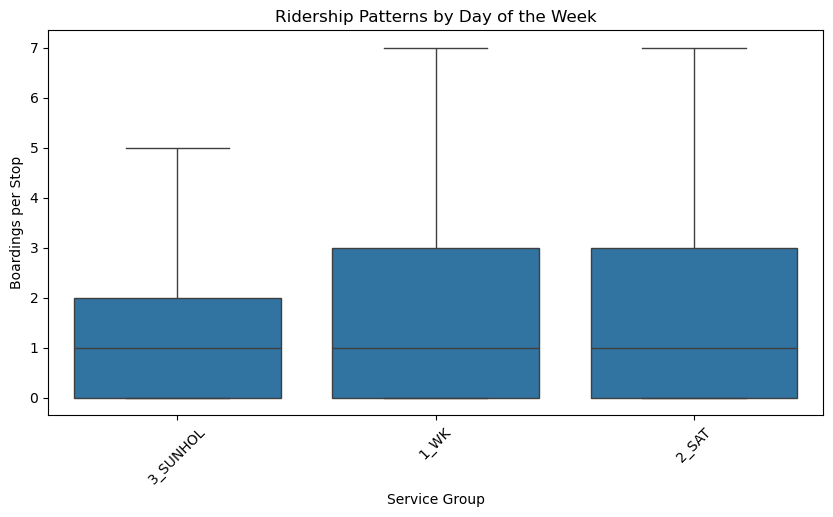

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_final, x='SERVICEGROUPABBR', y='BOARDING', showfliers=False)
plt.xlabel("Service Group")
plt.ylabel("Boardings per Stop")
plt.title("Ridership Patterns by Day of the Week")
plt.xticks(rotation=45)
plt.show()

#### Ridership Patterns by Day of the Week

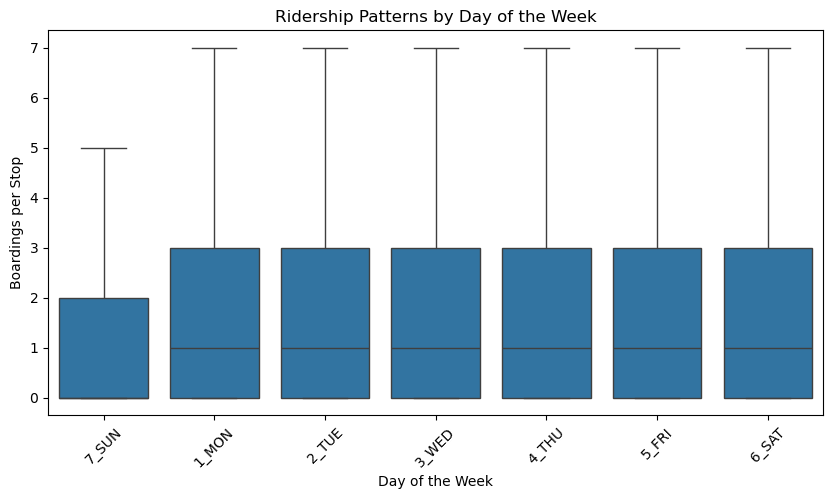

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_final, x='WEEKDAY', y='BOARDING', showfliers=False)
plt.xlabel("Day of the Week")
plt.ylabel("Boardings per Stop")
plt.title("Ridership Patterns by Day of the Week")
plt.xticks(rotation=45)
plt.show()

#### Dwell time by Pattern & Service Group

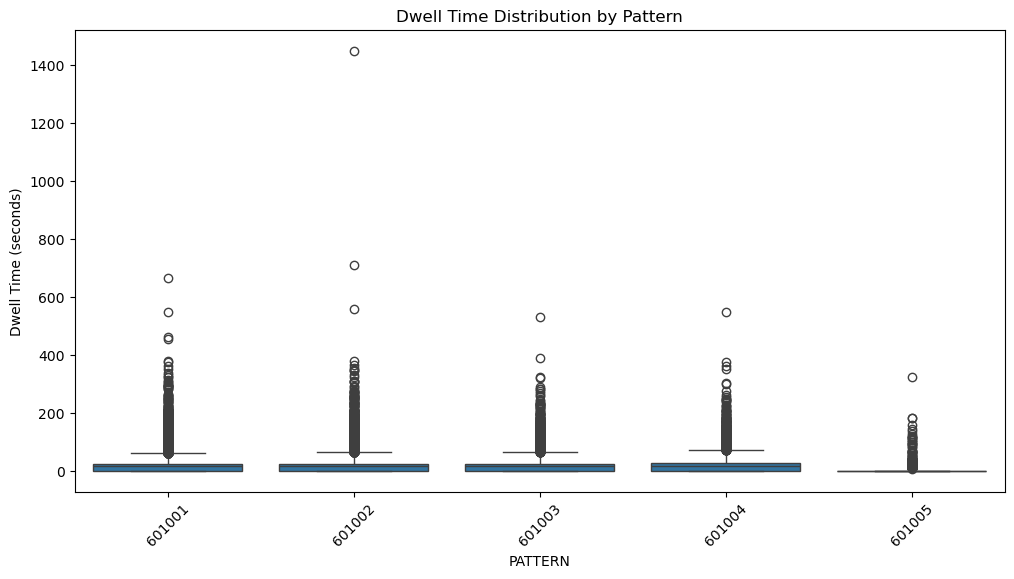

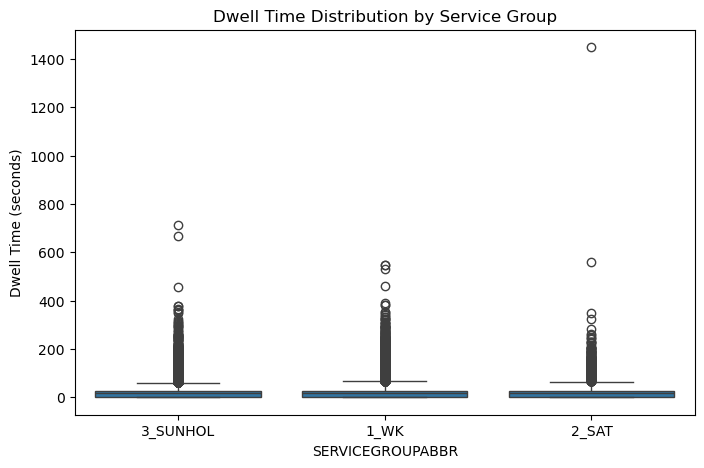

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_final, x="PATTERN", y="DWELL_TIME")
plt.xticks(rotation=45)
plt.ylabel("Dwell Time (seconds)")
plt.title("Dwell Time Distribution by Pattern")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_final, x="SERVICEGROUPABBR", y="DWELL_TIME")
plt.ylabel("Dwell Time (seconds)")
plt.title("Dwell Time Distribution by Service Group")
plt.show()

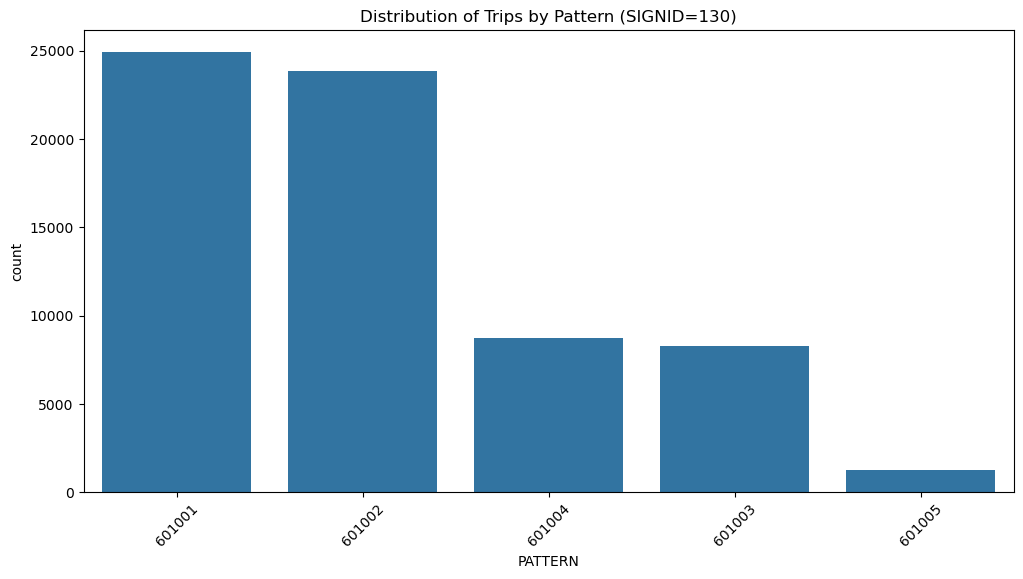

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PATTERN', data=df_final, order=df_final['PATTERN'].value_counts().index)
plt.title('Distribution of Trips by Pattern (SIGNID=130)')
plt.xticks(rotation=45)
plt.show()


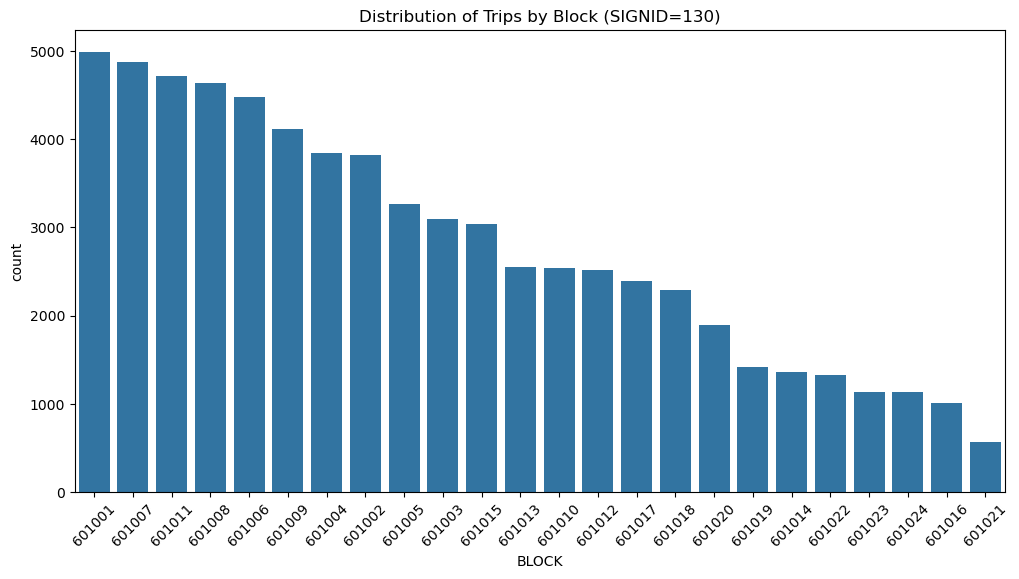

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x='BLOCK', data=df_final, order=df_final['BLOCK'].value_counts().index)
plt.title('Distribution of Trips by Block (SIGNID=130)')
plt.xticks(rotation=45)
plt.show()

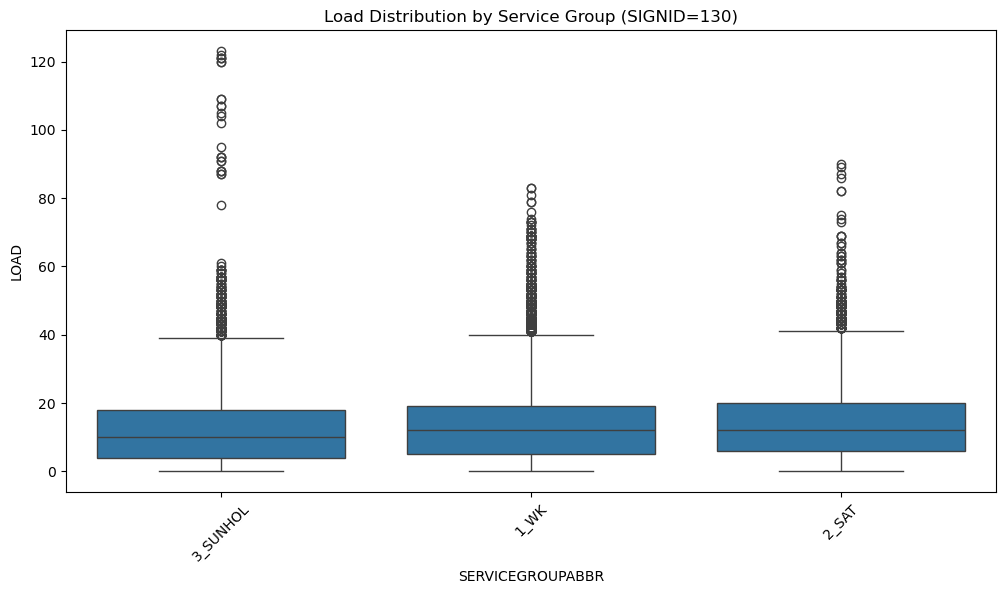

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='SERVICEGROUPABBR', y='LOAD', data=df_final)
plt.title('Load Distribution by Service Group (SIGNID=130)')
plt.xticks(rotation=45)
plt.show()

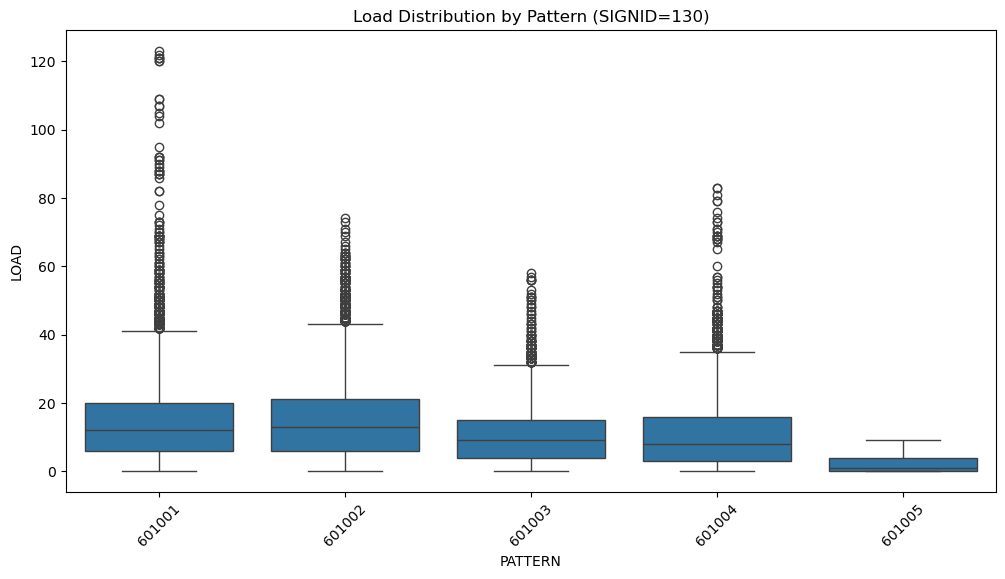

In [112]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='PATTERN', y='LOAD', data=df_final)
plt.title('Load Distribution by Pattern (SIGNID=130)')
plt.xticks(rotation=45)
plt.show()

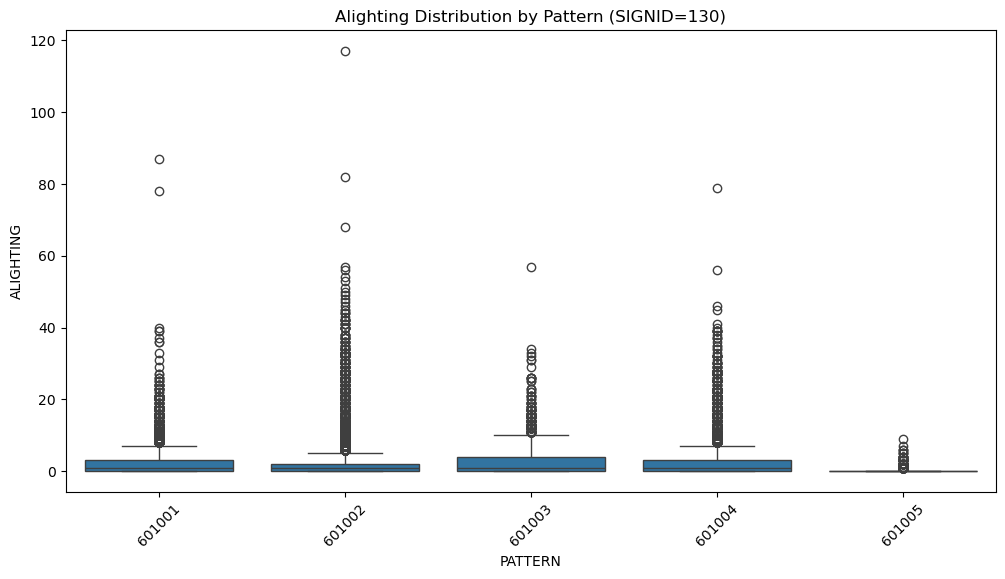

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='PATTERN', y='ALIGHTING', data=df_final)
plt.title('Alighting Distribution by Pattern (SIGNID=130)')
plt.xticks(rotation=45)
plt.show()

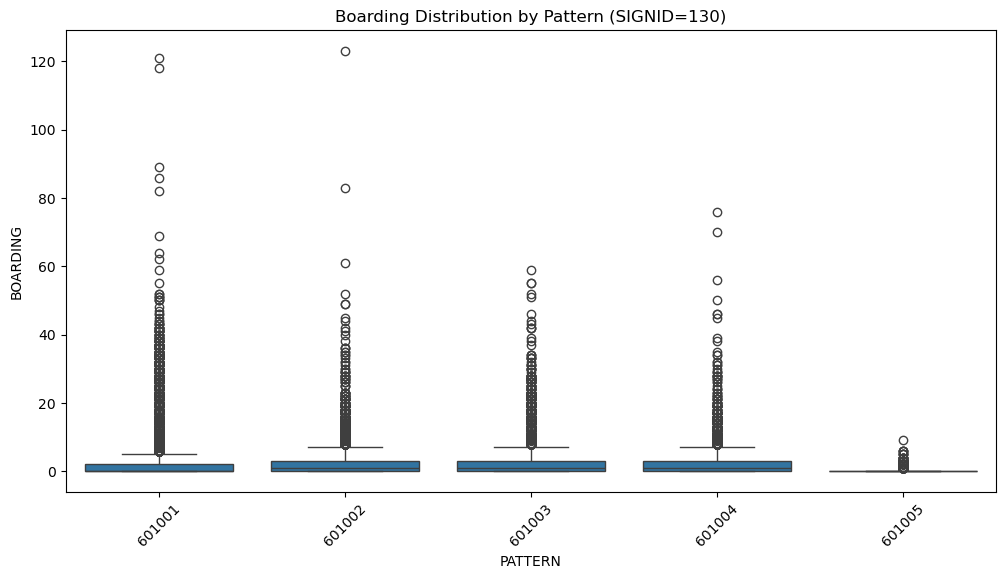

In [92]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='PATTERN', y='BOARDING', data=df_final)
plt.title('Boarding Distribution by Pattern (SIGNID=130)')
plt.xticks(rotation=45)
plt.show()

#### Speed Heatmap per Hour

In [28]:
df_weekday = df_final[df_final["SERVICEGROUPABBR"] == '1_WK']

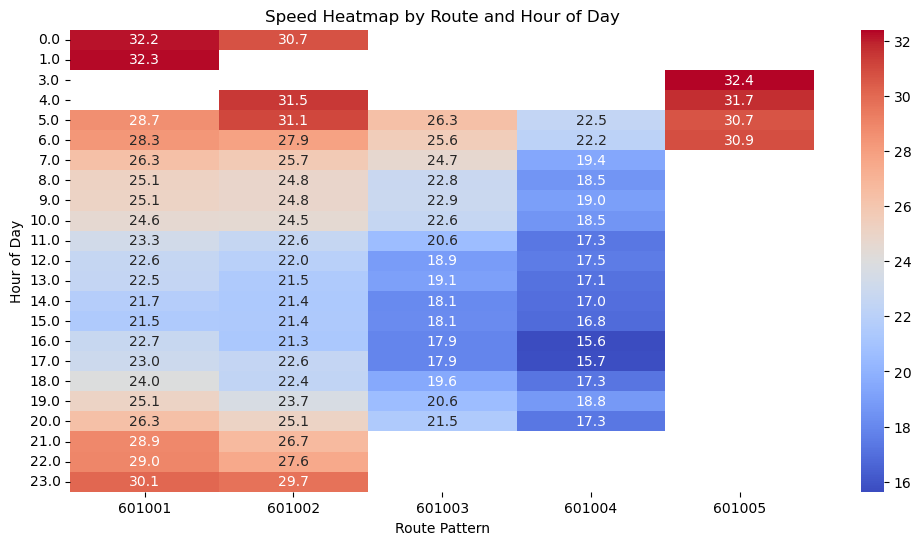

In [47]:
pivot_speed = df_weekday.pivot_table(values='ACT_SPEED', index='Hour', columns='PATTERN', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_speed, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Speed Heatmap by Route and Hour of Day")
plt.xlabel("Route Pattern")
plt.ylabel("Hour of Day")
plt.show()

In [29]:
df_final['Month'] = df_final['OPD_DATE'].dt.to_period('M').astype(str)

In [30]:
df_final['Month']

0        2022-12
1        2022-12
2        2022-12
3        2022-12
4        2022-12
          ...   
67011    2023-01
67012    2023-01
67013    2023-01
67014    2023-01
67015    2023-01
Name: Month, Length: 67016, dtype: object

In [31]:
def time_bucket(sec):
    hour = sec // 3600
    if 6 <= hour < 10:
        return 'AM Peak'
    elif 10 <= hour < 15:
        return 'Midday'
    elif 15 <= hour < 19:
        return 'PM Peak'
    else:
        return 'Other'

In [32]:
df_final['TimeOfDay'] = df_final['SCHED_START_TIME'].apply(time_bucket)

In [33]:
avg_load = df_final.groupby(['Month', 'TimeOfDay'])['LOAD'].mean().reset_index()

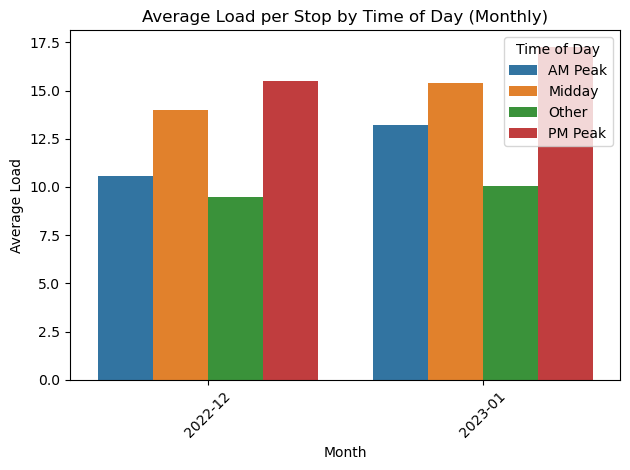

In [34]:
plt.figure()
sns.barplot(data=avg_load, x='Month', y='LOAD', hue='TimeOfDay')
plt.title('Average Load per Stop by Time of Day (Monthly)')
plt.ylabel('Average Load')
plt.xlabel('Month')
plt.legend(title='Time of Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("avg_load_per_stop.png")

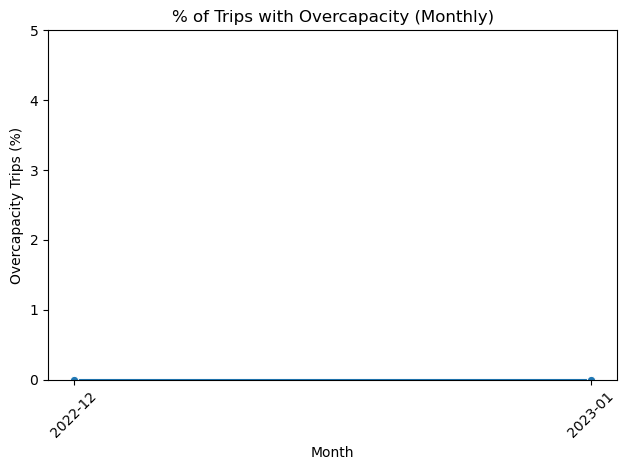

In [35]:
# Mark overloaded trips
df_final['IsOverloaded'] = df_final['LOAD_EXTRA'] > 0

# % of overloaded trips per month
overload_pct = df_final.groupby('Month')['IsOverloaded'].mean().reset_index()
overload_pct['IsOverloaded'] *= 100  # convert to %

# Plot
plt.figure()
sns.lineplot(data=overload_pct, x='Month', y='IsOverloaded', marker='o')
plt.title('% of Trips with Overcapacity (Monthly)')
plt.ylabel('Overcapacity Trips (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylim(0, overload_pct['IsOverloaded'].max() + 5)
plt.tight_layout()
plt.savefig("overcapacity_trips_pct.png")


In [44]:
df_final.columns

Index(['SIGNID', 'OPD_DATE', 'WEEKDAY', 'SERVICEGROUPABBR', 'EXCCOMBOID',
       'BLOCK', 'PATTERN', 'DIRECTION', 'EVENT_NO_TRIP', 'SCHED_START_TIME',
       'SCHED_END_TIME', 'SCHED_TRIP_TIME', 'ACT_START_TIME', 'ACT_END_TIME',
       'ACT_TRIP_TIME', 'DIFF_TRIP_TIME', 'OTP_TRIP_TIME', 'SCHED_DISTANCE',
       'ACT_DISTANCE', 'SCHED_SPEED', 'ACT_SPEED', 'POINT_COUNT',
       'POINT_FIRST', 'POINT_LAST', 'APC', 'IS_ADDITIONAL', 'COMPLETENESS',
       'VEHICLE_ID', 'VEHICLE', 'SEATS', 'CAPACITY', 'CAPACITY_MAX',
       'DRIVER_ID', 'EVENT_NO_STOP', 'SEQUENCE', 'POINT_SEQ', 'STOPABBR',
       'STOPTYPE', 'POINT_ROLE', 'NODE_SEQ', 'NODEID', 'ETIME',
       'SCHED_ARR_TIME', 'ACT_ARR_TIME', 'SCHED_DEP_TIME', 'ACT_DEP_TIME',
       'DIFF_DEP_TIME', 'DWELL_TIME', 'DOORS_OPENING', 'METERS',
       'DISTANCE_TO_NEXT', 'DISTANCE_TO_TRIP', 'GPS_LATITUDE', 'GPS_LONGITUDE',
       'BOARDING_ORIG', 'ALIGHTING_ORIG', 'LOAD_ORIG', 'BOARDING', 'ALIGHTING',
       'LOAD', 'LOAD_EXTRA', 'WHEELCHAIR_COUN

In [45]:
trip_util = df_final.groupby(['OPD_DATE', 'EVENT_NO_TRIP']).agg({
    'LOAD': 'sum',
    'CAPACITY_MAX': 'sum'
}).reset_index()

In [46]:
trip_util['TripUtilization'] = trip_util['LOAD'] / trip_util['CAPACITY_MAX'].replace(0, np.nan)

# Step 2: Daily utilization (average across all trips that day)
daily_util = trip_util.groupby('OPD_DATE')['TripUtilization'].mean().reset_index()
daily_util.rename(columns={'TripUtilization': 'DailyUtilization'}, inplace=True)

# Step 3: Monthly index (average daily utilization)
daily_util['Month'] = daily_util['OPD_DATE'].dt.to_period('M').dt.to_timestamp()
monthly_util = daily_util.groupby('Month')['DailyUtilization'].mean().reset_index()

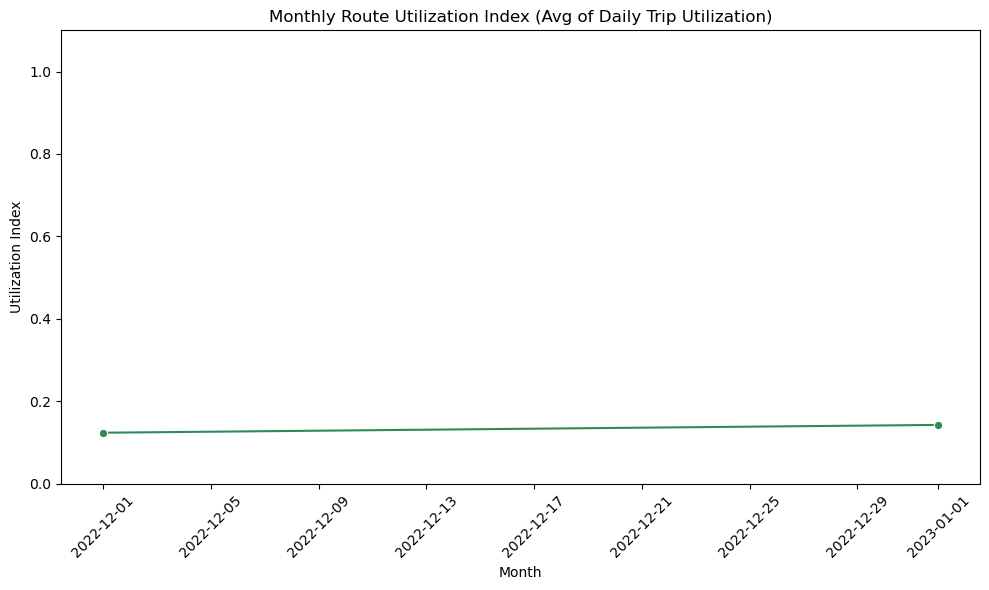

In [47]:
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_util, x='Month', y='DailyUtilization', marker='o', color='seagreen')

plt.title('Monthly Route Utilization Index (Avg of Daily Trip Utilization)')
plt.ylabel('Utilization Index')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig("monthly_trip_based_utilization.png")
plt.show()

#### Ridership Trends Over Time

/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_89605/675386316.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_weekday, x='Hour', y='BOARDING', label="Boarding", ci=None)
/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_89605/675386316.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_weekday, x='Hour', y='ALIGHTING', label="Alighting", ci=None)
/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_89605/675386316.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_weekday, x='Hour', y='LOAD', label="Load", ci=None)


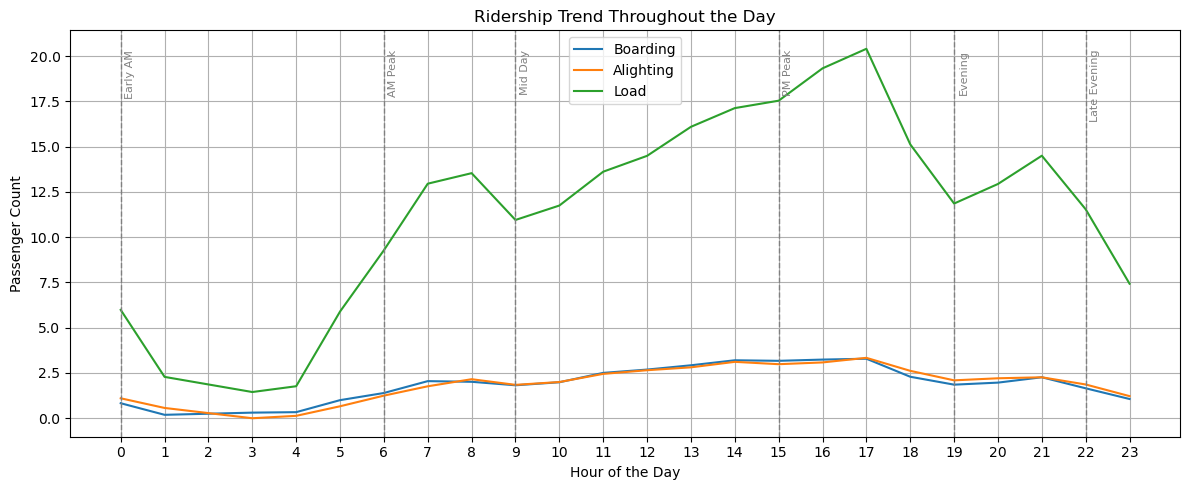

In [48]:
plt.figure(figsize=(12, 5))

# Plot the boarding, alighting, and load lines
sns.lineplot(data=df_weekday, x='Hour', y='BOARDING', label="Boarding", ci=None)
sns.lineplot(data=df_weekday, x='Hour', y='ALIGHTING', label="Alighting", ci=None)
sns.lineplot(data=df_weekday, x='Hour', y='LOAD', label="Load", ci=None)

# Add vertical dashed lines for time ranges
time_dividers = {
    "Early AM": 0,
    "AM Peak": 6,
    "Mid Day": 9,
    "PM Peak": 15,
    "Evening": 19,
    "Late Evening": 22
}

for label, x in time_dividers.items():
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=1)
    plt.text(x + 0.1, plt.ylim()[1]*0.95, label, rotation=90, verticalalignment='top', fontsize=8, color='gray')

# Final plot touches
plt.xlabel("Hour of the Day")
plt.ylabel("Passenger Count")
plt.title("Ridership Trend Throughout the Day")
plt.xticks(range(0, 24))  # Ensure x-axis shows all hours
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_40524/1841867910.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_weekday, x='Hour', y='BOARDING', label="Boarding", ci=None)
/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_40524/1841867910.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_weekday, x='Hour', y='ALIGHTING', label="Alighting", ci=None)
/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_40524/1841867910.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_weekday, x='Hour', y='LOAD', label="Load", ci=None)


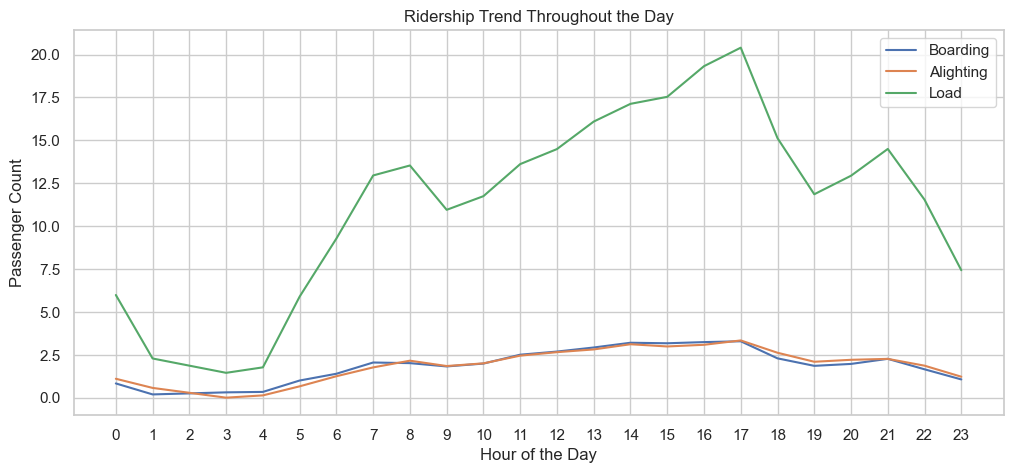

In [317]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_weekday, x='Hour', y='BOARDING', label="Boarding", ci=None)
sns.lineplot(data=df_weekday, x='Hour', y='ALIGHTING', label="Alighting", ci=None)
sns.lineplot(data=df_weekday, x='Hour', y='LOAD', label="Load", ci=None)

plt.xlabel("Hour of the Day")
plt.ylabel("Passenger Count")
plt.title("Ridership Trend Throughout the Day")
plt.xticks(range(0, 24))  # Ensure x-axis shows all hours
plt.legend()
plt.grid(True)
plt.show()

In [50]:
df_final[df_final["ACT_SPEED"] >= 2500]

,SIGNID,OPD_DATE,WEEKDAY,SERVICEGROUPABBR,EXCCOMBOID,BLOCK,PATTERN,DIRECTION,EVENT_NO_TRIP,SCHED_START_TIME,...,RUN_TIME,TIME_DIFF_ARR,TIME_DIFF_DEP,TIME_DIFF_START,TIME_DIFF_END,SPEED_STOP_TO_STOP,SPEED_TRIP,ACT_ARR_TIME_HHMM,ACT_DEP_TIME_HHMM,Hour
55766,130,2022-12-31,6_SAT,2_SAT,35035.0,601006,601002,SOUTHBOUND,1025362255,62340,...,NaN,434.0,434.0,4770.0,434.0,NaN,741.272727,18:39:14,18:39:14,18.0


#### Speed Comparison

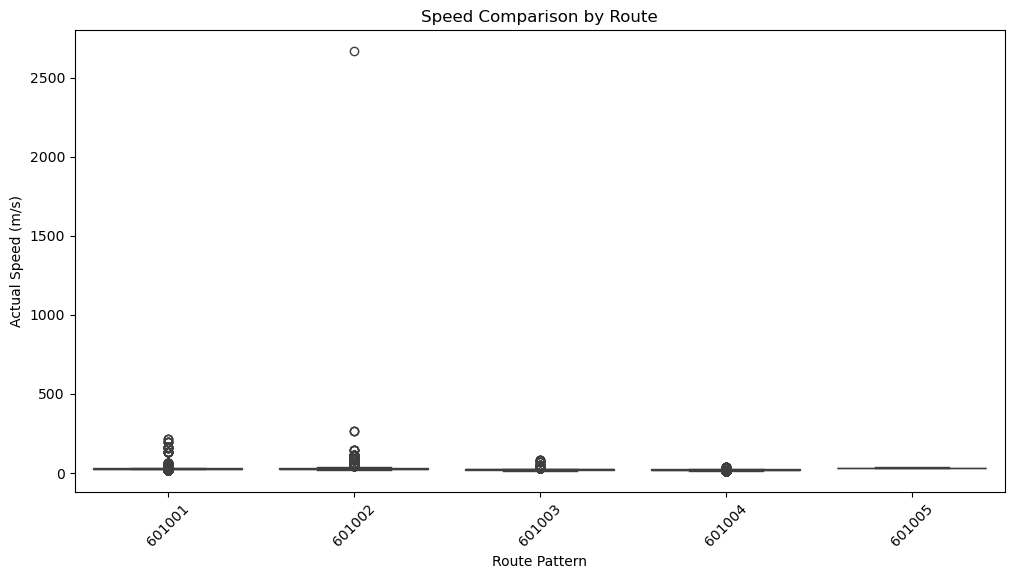

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="PATTERN", y=df["ACT_SPEED"], data=df_final)
plt.xticks(rotation=45)
plt.xlabel("Route Pattern")
plt.ylabel("Actual Speed (m/s)")
plt.title("Speed Comparison by Route")
plt.show()

#### Dwell time by Stop

/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_40524/3747352592.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_final, x='STOPABBR', y='DWELL_TIME', estimator=np.mean, ci=None)


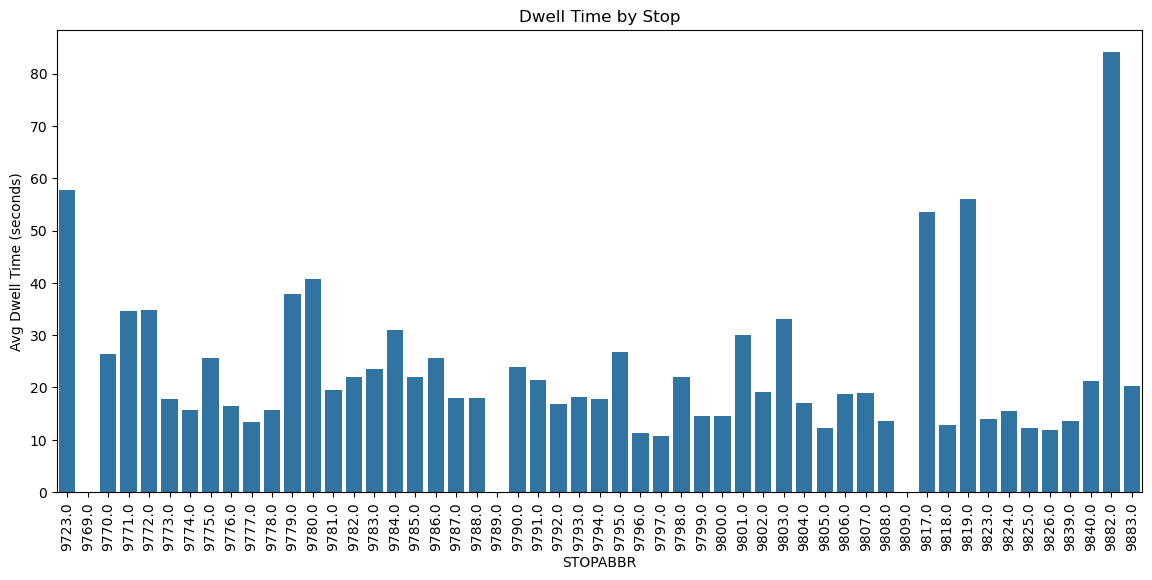

In [146]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_final, x='STOPABBR', y='DWELL_TIME', estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.ylabel("Avg Dwell Time (seconds)")
plt.title("Dwell Time by Stop")
plt.show()

#### Dwell time, Missed tRIP By Service Group & Pattern

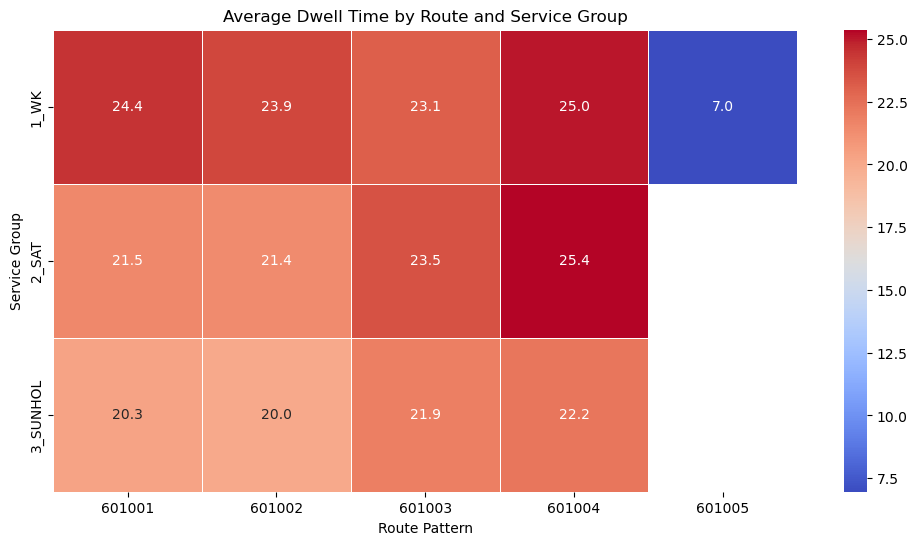

In [195]:
heatmap_data = df_final.pivot_table(values="DWELL_TIME", index="SERVICEGROUPABBR", columns="PATTERN", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.xlabel("Route Pattern")
plt.ylabel("Service Group")
plt.title("Average Dwell Time by Route and Service Group")
plt.show()

#### Trip Delay Distribution

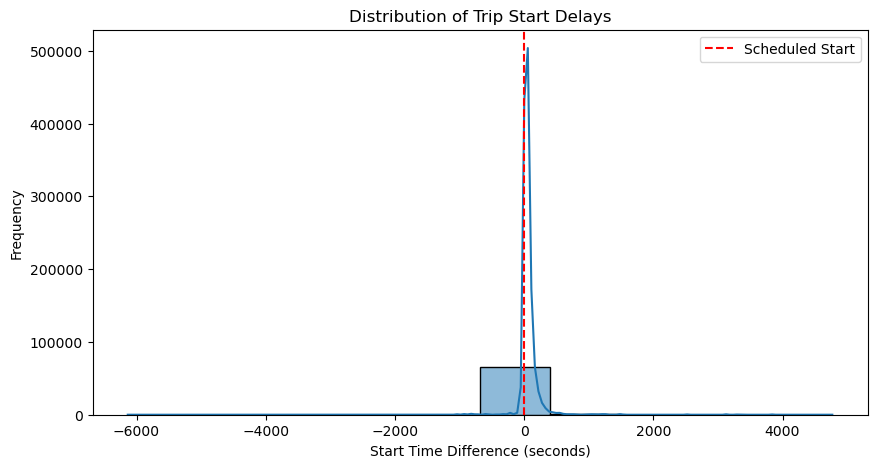

In [155]:
df_final['START_TIME_DIFF'] = df_final['ACT_START_TIME'] - df_final['SCHED_START_TIME']

plt.figure(figsize=(10, 5))
sns.histplot(df_final['START_TIME_DIFF'], bins=10, kde=True)
plt.axvline(x=0, color='red', linestyle='--', label="Scheduled Start")
plt.xlabel("Start Time Difference (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Start Delays")
plt.legend()
plt.show()

#### Dwell time vs Load

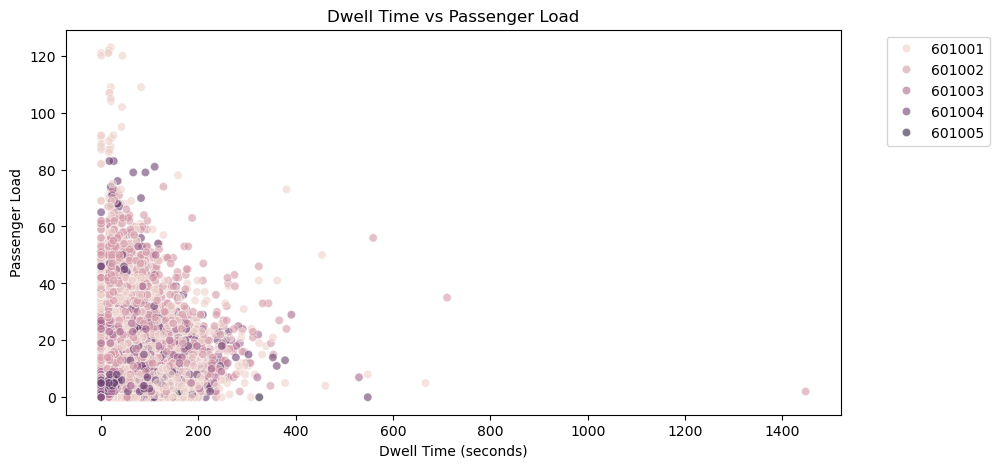

In [156]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_final, x='DWELL_TIME', y='LOAD', hue='PATTERN', alpha=0.6)
plt.xlabel("Dwell Time (seconds)")
plt.ylabel("Passenger Load")
plt.title("Dwell Time vs Passenger Load")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

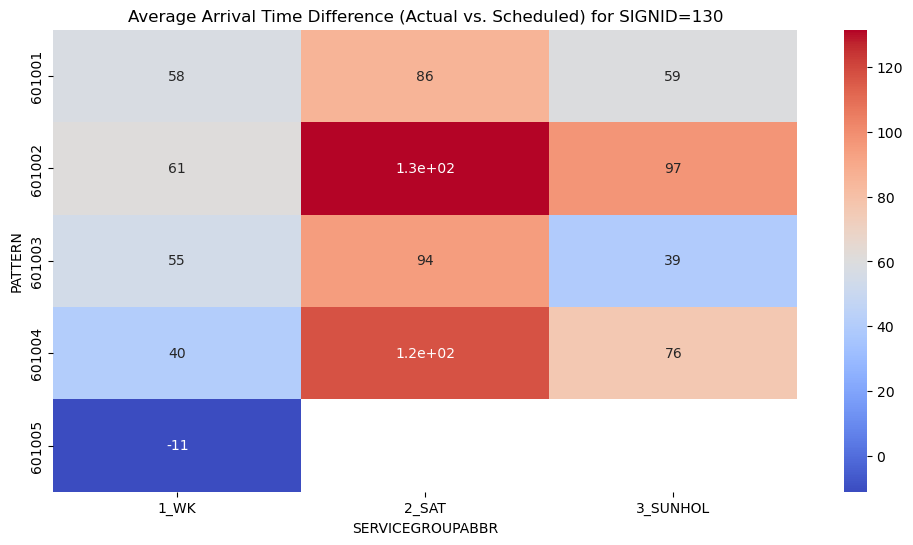

In [114]:
pivot_table_130 = df_final.pivot_table(values='TIME_DIFF_ARR', index='PATTERN', columns='SERVICEGROUPABBR', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_130, cmap='coolwarm', annot=True)
plt.title('Average Arrival Time Difference (Actual vs. Scheduled) for SIGNID=130')
plt.show()

#### Boarding & Alighting Heatmap by Stop

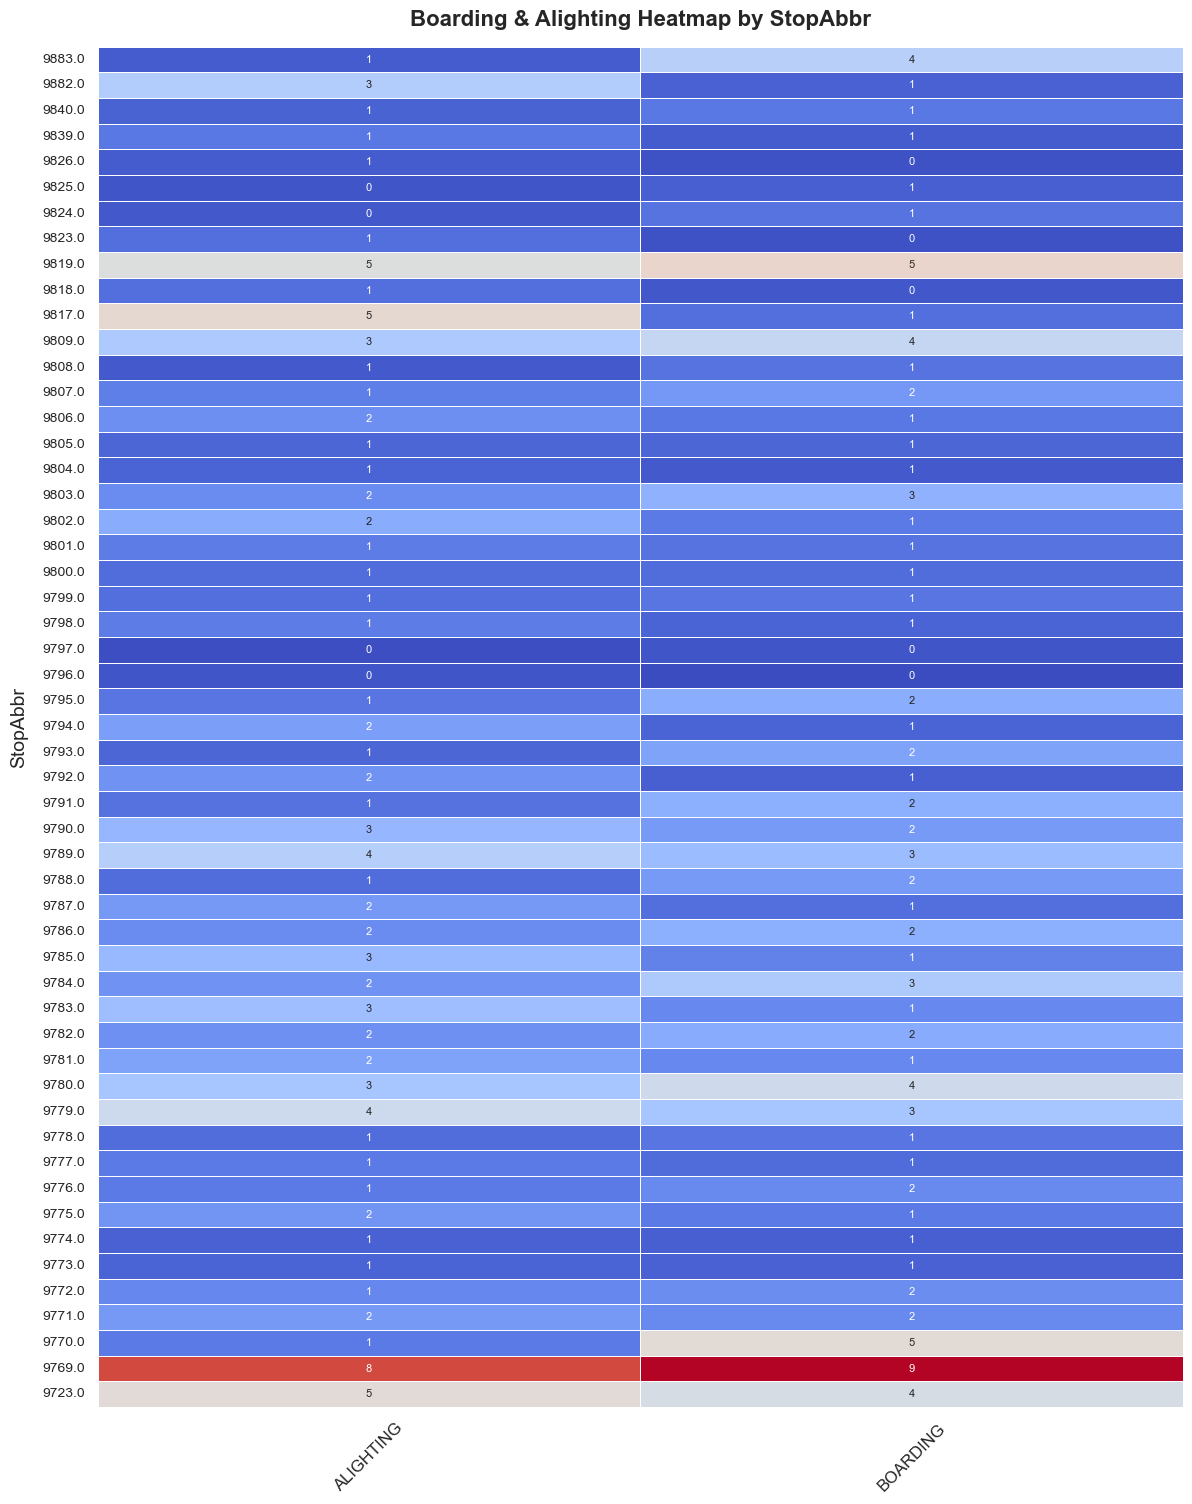

In [314]:
pivot_table = df_final.pivot_table(values=['BOARDING', 'ALIGHTING'], index='STOPABBR', aggfunc='mean').sort_values(by='STOPABBR', ascending=False)

plt.figure(figsize=(14, max(10, len(pivot_table) / 3)))  

# Create heatmap with better formatting
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5, 
            annot_kws={"size": 8}, yticklabels=True, cbar=False)  # Ensures all stop labels show

# Improve title and labels
plt.title("Boarding & Alighting Heatmap by StopAbbr", fontsize=16, fontweight='bold', pad=15)
plt.ylabel("StopAbbr", fontsize=14, labelpad=10)

# Rotate x-axis labels and adjust font sizes
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=10)

# Show plot
plt.show()

In [311]:
pivot_table

,ALIGHTING,BOARDING
STOPABBR,,
9883.0,464.0,3115.0
9882.0,3320.0,613.0
9840.0,613.0,1010.0
9839.0,1104.0,517.0
9826.0,516.0,314.0
9825.0,355.0,537.0
9824.0,426.0,901.0
9823.0,895.0,315.0
9819.0,6988.0,7639.0


In [117]:
df_final["ACT_ARR_TIME"]

65511        NaN
65510        NaN
65507        NaN
65509        NaN
65508        NaN
          ...   
55517    63390.0
55520    63466.0
55516    63597.0
55523    63759.0
55526    64161.0
Name: ACT_ARR_TIME, Length: 67016, dtype: float64

## Anomaly Detection

In [160]:
from scipy.stats import zscore

# Define function to detect anomalies based on Z-score
def detect_anomalies(df, column, threshold=3):
    df['Z_score'] = zscore(df[column].dropna())
    df['Anomaly'] = df['Z_score'].abs() > threshold
    return df[df['Anomaly']]

# Detect anomalies in trip start time deviations
anomalies_start_time = detect_anomalies(df_final, 'START_TIME_DIFF')

# Detect anomalies in speed
anomalies_speed = detect_anomalies(df_final, 'ACT_SPEED')

# Detect anomalies in dwell time
anomalies_dwell = detect_anomalies(df_final, 'DWELL_TIME')

# Print anomaly samples
print("Anomalies in Start Time:")
print(anomalies_start_time[['EVENT_NO_TRIP', 'PATTERN', 'START_TIME_DIFF']].head(20))

print("\nAnomalies in Speed:")
print(anomalies_speed[['EVENT_NO_TRIP', 'PATTERN', 'ACT_SPEED']].head(20))

print("\nAnomalies in Dwell Time:")
print(anomalies_dwell[['EVENT_NO_TRIP', 'PATTERN', 'DWELL_TIME']].head(20))

Anomalies in Start Time:
       EVENT_NO_TRIP  PATTERN  START_TIME_DIFF
10970      996106403   601002           2985.0
10971      996106403   601002           2985.0
10973      996106403   601002           2985.0
10975      996106403   601002           2985.0
10972      996106403   601002           2985.0
10974      996106403   601002           2985.0
7846       996132632   601004           1109.0
7847       996132632   601004           1109.0
7855       996132632   601004           1109.0
7845       996132632   601004           1109.0
7856       996132632   601004           1109.0
7854       996132632   601004           1109.0
7843       996132632   601004           1109.0
7853       996132632   601004           1109.0
7850       996132632   601004           1109.0
7849       996132632   601004           1109.0
7844       996132632   601004           1109.0
7851       996132632   601004           1109.0
7848       996132632   601004           1109.0
7852       996132632   601004      

#### Outliers in Run Time

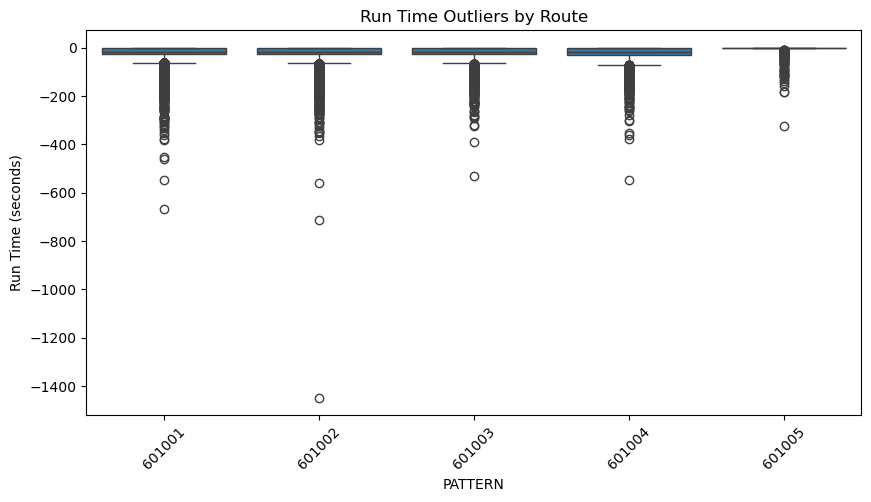

In [148]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="PATTERN", y=(df_final["ACT_ARR_TIME"] - df_final["ACT_DEP_TIME"]), data=df_final)
plt.xticks(rotation=45)
plt.ylabel("Run Time (seconds)")
plt.title("Run Time Outliers by Route")
plt.show()

#### Missed Trips & Stops Heatmap

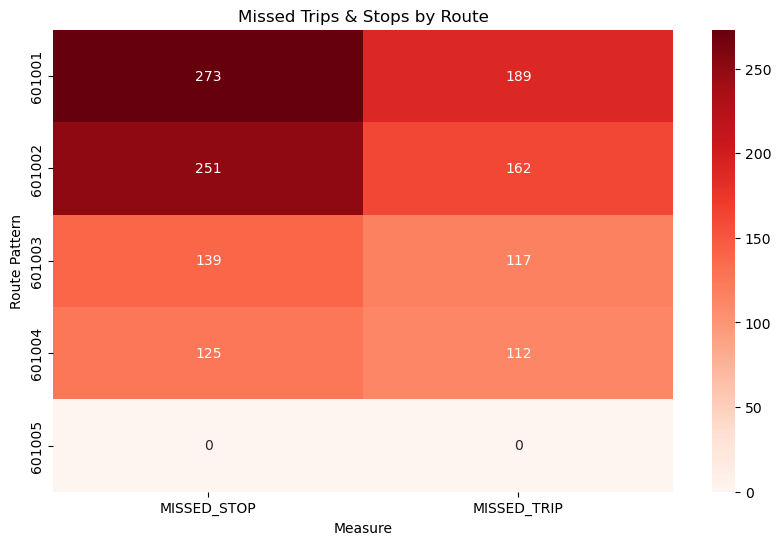

In [149]:
pivot_table = df_final.pivot_table(values=['MISSED_TRIP', 'MISSED_STOP'], index='PATTERN', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="Reds", annot=True, fmt=".0f")
plt.title("Missed Trips & Stops by Route Pattern")
plt.xlabel("Measure")
plt.ylabel("Route Pattern")
plt.show()

#### Missed Trip and Stop Rates at the Trip Level

In [166]:
trip_summary = df_final.groupby('EVENT_NO_TRIP').agg(
    PATTERN=('PATTERN', 'first'),  # Get first occurrence (since it's unique per trip)
    SERVICEGROUP=('SERVICEGROUPABBR', 'first'),
    MISSED_TRIP=('MISSED_TRIP', 'max'),  # If any row has a missed trip, set trip as missed
    MISSED_STOP_COUNT=('MISSED_STOP', 'sum'),  # Count missed stops in a trip
    TOTAL_STOPS=('SEQUENCE', 'max')  # Total stops in the trip
).reset_index()

# Calculate missed stop rate per trip
trip_summary['MISSED_STOP_RATE'] = (trip_summary['MISSED_STOP_COUNT'] / trip_summary['TOTAL_STOPS']) * 100

# Print overall statistics
missed_trip_rate = trip_summary['MISSED_TRIP'].mean() * 100
missed_stop_rate = trip_summary['MISSED_STOP_RATE'].mean()

print(f"Overall Missed Trip Rate: {missed_trip_rate:.2f}%")
print(f"Average Missed Stop Rate per Trip: {missed_stop_rate:.2f}%")

# Display the trip-level summary
trip_summary.head()

Overall Missed Trip Rate: 0.95%
Average Missed Stop Rate per Trip: 1.08%


,EVENT_NO_TRIP,PATTERN,SERVICEGROUP,MISSED_TRIP,MISSED_STOP_COUNT,TOTAL_STOPS,MISSED_STOP_RATE
0,4627598,601003,2_SAT,1,13,13.0,100.000000
1,4627663,601001,2_SAT,1,27,28.0,96.428571
2,4627668,601001,2_SAT,1,27,28.0,96.428571
3,4627776,601002,2_SAT,1,27,28.0,96.428571
4,4664682,601001,2_SAT,1,27,28.0,96.428571


#### Missed Trips and Stops by Pattern

In [167]:
missed_by_pattern = trip_summary.groupby('PATTERN').agg(
    Missed_Trip_Rate=('MISSED_TRIP', 'mean'),
    Avg_Missed_Stop_Rate=('MISSED_STOP_RATE', 'mean'),
    Total_Trips=('EVENT_NO_TRIP', 'count')
).reset_index()

# Convert rates to percentages
missed_by_pattern[['Missed_Trip_Rate', 'Avg_Missed_Stop_Rate']] *= 100

print(missed_by_pattern.sort_values(by='Missed_Trip_Rate', ascending=False))

   PATTERN  Missed_Trip_Rate  Avg_Missed_Stop_Rate  Total_Trips
2   601003          1.401869            166.546849          642
3   601004          1.284109             71.657877          623
0   601001          0.751880            104.726101          931
1   601002          0.674157            101.488399          890
4   601005          0.000000              0.000000           56


#### Missed Trips by Pattern and Service Group

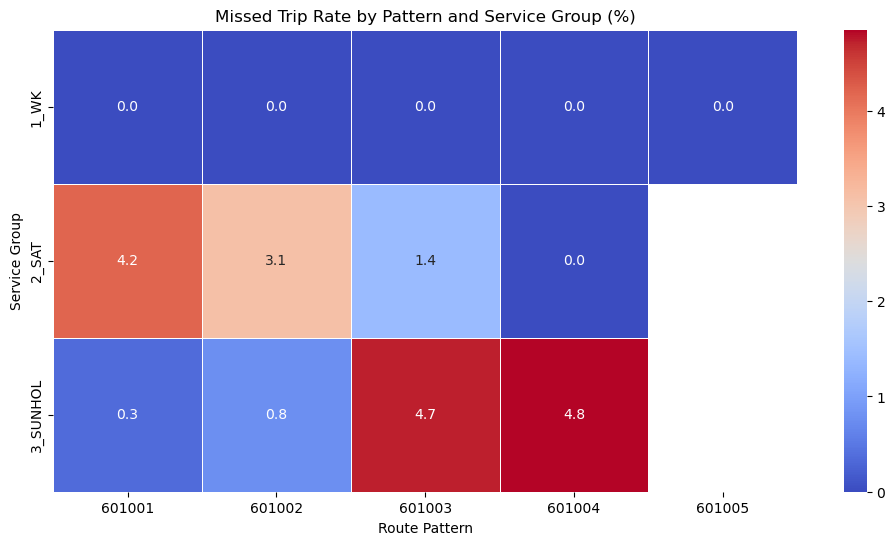

In [200]:
missed_pivot = trip_summary.pivot_table(
    values='MISSED_TRIP', index='SERVICEGROUP', columns='PATTERN', aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(missed_pivot * 100, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)

plt.xlabel("Route Pattern")
plt.ylabel("Service Group")
plt.title("Missed Trip Rate by Pattern and Service Group (%)")
plt.show()

In [205]:
df1 = df_final[(df_final['SERVICEGROUPABBR'] == '3_SUNHOL') & (df_final['PATTERN'] == 601004)]

In [216]:
df2 = df_final[(df_final['SERVICEGROUPABBR'] == '2_SAT') & (df_final['PATTERN'] == 601001)]

In [217]:
df2["MISSED_TRIP"]

55117    1
55126    1
52831    1
55133    1
52824    1
        ..
52399    0
52386    0
52401    0
52397    0
52379    0
Name: MISSED_TRIP, Length: 3808, dtype: int64

In [ ]:
missed_by_date = df1.groupby('OPD_DATE')['MISSED_TRIP'].mean().reset_index()

In [208]:
unique_trips = df1.drop_duplicates(subset=['EVENT_NO_TRIP'])

In [210]:
missed_by_date = unique_trips.groupby('OPD_DATE')['MISSED_TRIP'].sum().reset_index()

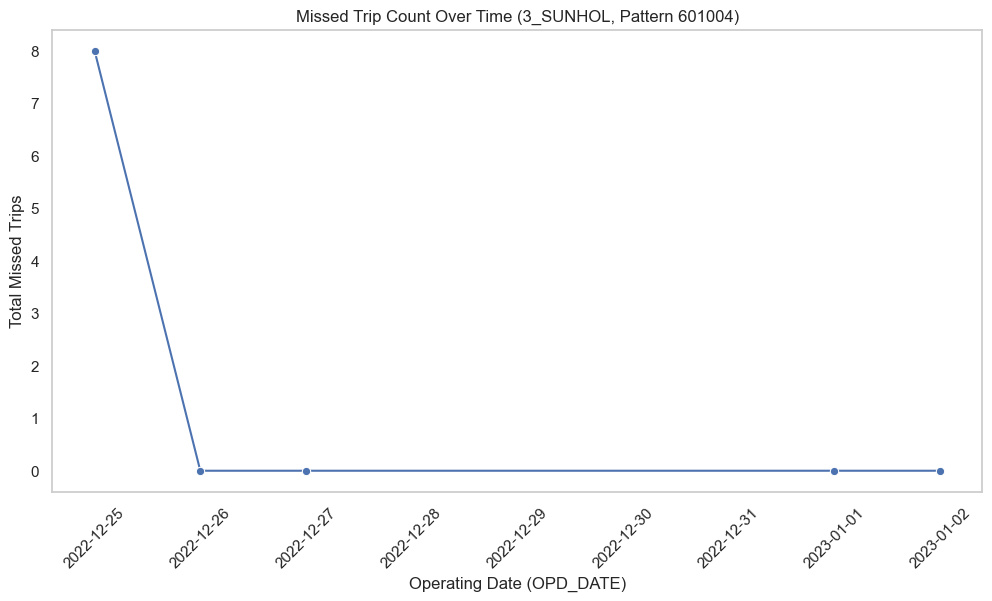

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='OPD_DATE', y='MISSED_TRIP', data=missed_by_date, marker='o')
plt.title("Missed Trip Count Over Time (3_SUNHOL, Pattern 601004)")
plt.xlabel("Operating Date (OPD_DATE)")
plt.ylabel("Total Missed Trips")
plt.xticks(rotation=45)
plt.grid()
plt.show()

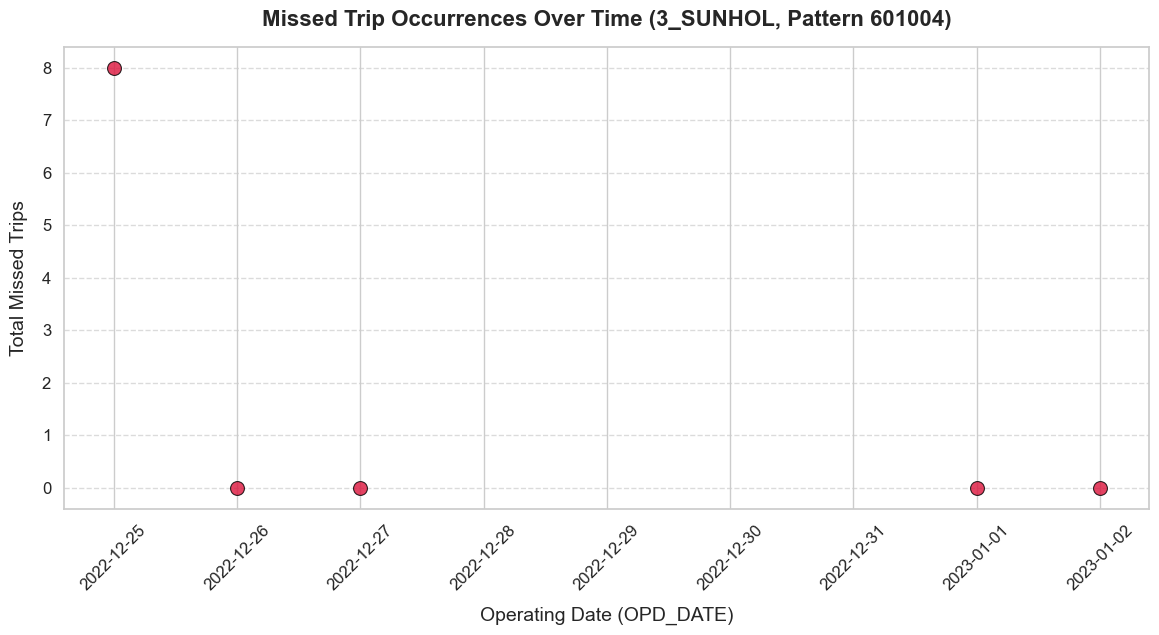

In [222]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 6))  # Larger figure for better readability

# Scatter plot (only showing points where data exists)
sns.scatterplot(x='OPD_DATE', y='MISSED_TRIP', data=missed_by_date, 
                s=100, color='crimson', edgecolor='black', alpha=0.8)

# Improve title and labels
plt.title("Missed Trip Occurrences Over Time (3_SUNHOL, Pattern 601004)", 
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Operating Date (OPD_DATE)", fontsize=14, labelpad=10)
plt.ylabel("Total Missed Trips", fontsize=14, labelpad=10)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add light grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [218]:
unique_trips2 = df2.drop_duplicates(subset=['EVENT_NO_TRIP'])
missed_by_date2 = unique_trips2.groupby('OPD_DATE')['MISSED_TRIP'].sum().reset_index()

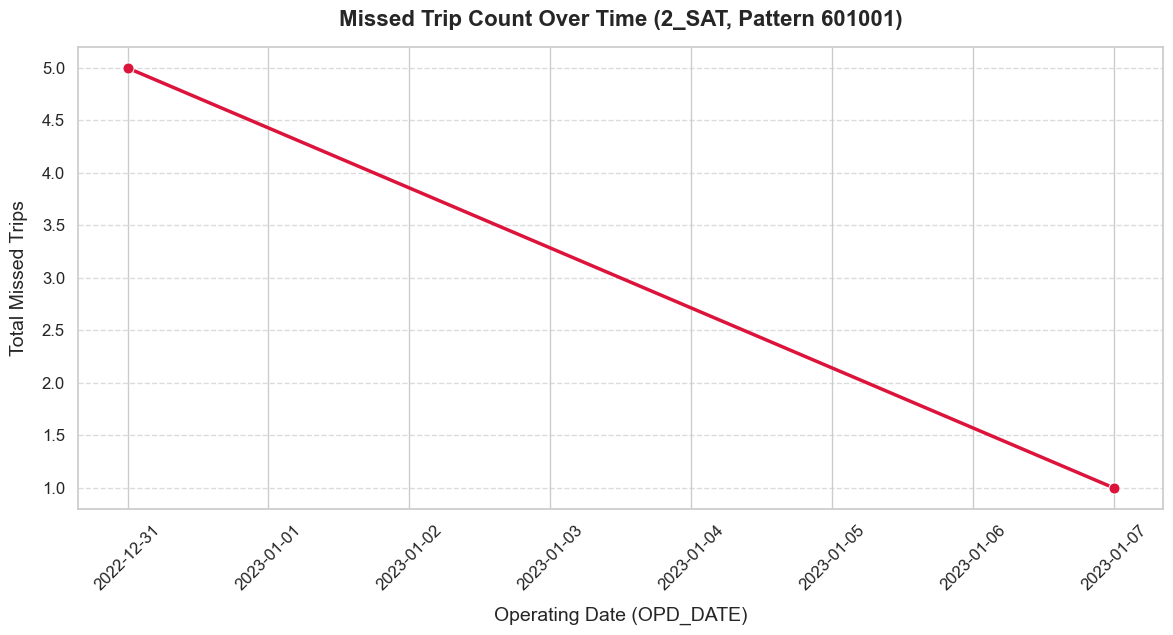

In [220]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 6))  # Wider figure for readability

# Improved line plot with better aesthetics
sns.lineplot(x='OPD_DATE', y='MISSED_TRIP', data=missed_by_date2, 
             marker='o', linewidth=2.5, markersize=8, color='crimson')

# Improve title and labels
plt.title("Missed Trip Count Over Time (2_SAT, Pattern 601001)", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Operating Date (OPD_DATE)", fontsize=14, labelpad=10)
plt.ylabel("Total Missed Trips", fontsize=14, labelpad=10)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [274]:
filtered_df = df_final[(df_final['SERVICEGROUPABBR'] == '2_SAT') & (df_final['PATTERN'] == 601001) & (df_final["OPD_DATE"] == '2022-12-31')]

In [227]:
unique_trips3 = filtered_df.drop_duplicates(subset=['EVENT_NO_TRIP'])

# Count total missed trips
missed_trip_count3 = unique_trips3['MISSED_TRIP'].sum()
print(f"Total Missed Trips on 2022-12-31 (2_SAT, 601001): {missed_trip_count3}")

Total Missed Trips on 2022-12-31 (2_SAT, 601001): 5


In [228]:
missed_stops3 = filtered_df.groupby('STOPABBR')['MISSED_STOP'].sum().reset_index()

# Sort by highest missed stops
missed_stops3 = missed_stops3.sort_values(by='MISSED_STOP', ascending=False)
print(missed_stops3.head(10))

    STOPABBR  MISSED_STOP
21    9809.0            8
18    9802.0            7
26    9882.0            7
20    9806.0            7
19    9804.0            7
24    9826.0            7
22    9818.0            7
12    9790.0            6
15    9796.0            6
17    9800.0            6


In [320]:
dwell_time = filtered_df.groupby('STOPABBR')['DWELL_TIME'].mean().reset_index()

# Sort by highest missed stops
dwell_time = dwell_time.sort_values(by='DWELL_TIME', ascending=False)
print(dwell_time.head(10))

    STOPABBR  DWELL_TIME
26    9882.0   87.294118
0     9723.0   48.828571
7     9779.0   32.514286
3     9771.0   32.442857
2     9770.0   25.985714
10    9785.0   22.200000
9     9783.0   21.671429
5     9775.0   20.728571
12    9790.0   20.608696
20    9806.0   20.220588


/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_40524/1937609778.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='STOPABBR', y='DWELL_TIME', data=dwell_time.head(10), palette="Reds_r")


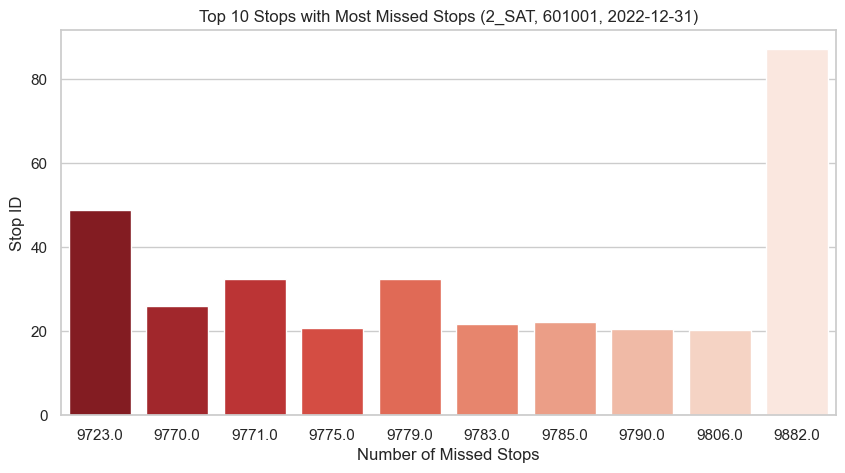

In [321]:
plt.figure(figsize=(10, 5))
sns.barplot(x='STOPABBR', y='DWELL_TIME', data=dwell_time.head(10), palette="Reds_r")
plt.title("Top 10 Stops with Most Missed Stops (2_SAT, 601001, 2022-12-31)")
plt.xlabel("Number of Missed Stops")
plt.ylabel("Stop ID")
plt.show()

/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_40524/2274760537.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='STOPABBR', y='MISSED_STOP', data=missed_stops3.head(10), palette="Reds_r")


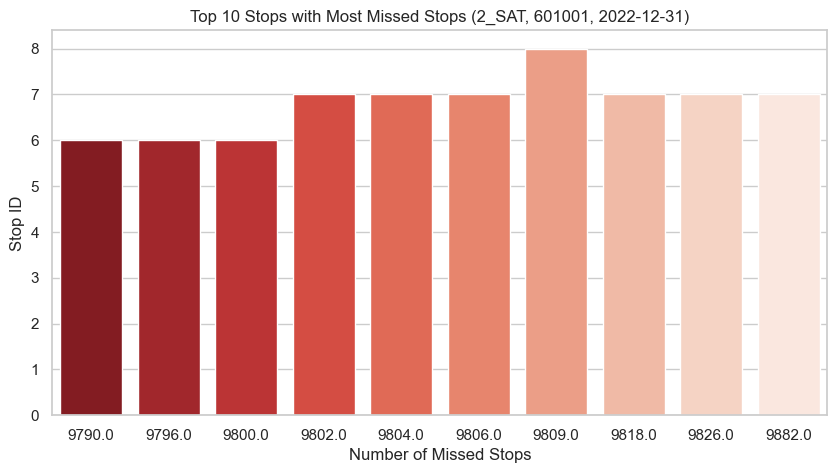

In [318]:
plt.figure(figsize=(10, 5))
sns.barplot(x='STOPABBR', y='MISSED_STOP', data=missed_stops3.head(10), palette="Reds_r")
plt.title("Top 10 Stops with Most Missed Stops (2_SAT, 601001, 2022-12-31)")
plt.xlabel("Number of Missed Stops")
plt.ylabel("Stop ID")
plt.show()

In [233]:
avg_dwell_time = filtered_df['DWELL_TIME'].mean()
print(f"Average Dwell Time on 2022-12-31: {avg_dwell_time:.2f} seconds")

Average Dwell Time on 2022-12-31: 20.52 seconds


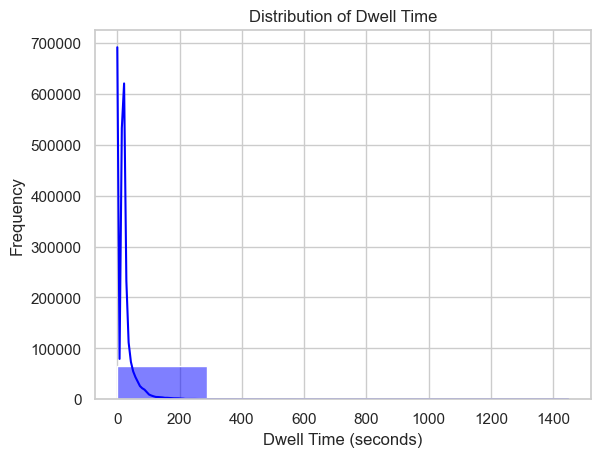

In [306]:
sns.histplot(df_final['DWELL_TIME'], bins=5, kde=True, color="blue")
plt.title("Distribution of Dwell Time")
plt.xlabel("Dwell Time (seconds)")
plt.ylabel("Frequency")
plt.show()

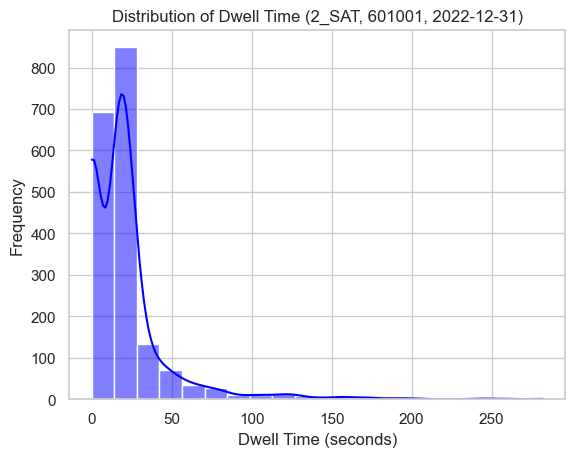

In [234]:
sns.histplot(filtered_df['DWELL_TIME'], bins=20, kde=True, color="blue")
plt.title("Distribution of Dwell Time (2_SAT, 601001, 2022-12-31)")
plt.xlabel("Dwell Time (seconds)")
plt.ylabel("Frequency")
plt.show()

In [302]:
new_df = filtered_df[filtered_df["MISSED_TRIP"] == 1]

In [276]:
filtered_df.columns

Index(['SIGNID', 'OPD_DATE', 'WEEKDAY', 'SERVICEGROUPABBR', 'EXCCOMBOID',
       'BLOCK', 'PATTERN', 'DIRECTION', 'EVENT_NO_TRIP', 'SCHED_START_TIME',
       'SCHED_END_TIME', 'SCHED_TRIP_TIME', 'ACT_START_TIME', 'ACT_END_TIME',
       'ACT_TRIP_TIME', 'DIFF_TRIP_TIME', 'OTP_TRIP_TIME', 'SCHED_DISTANCE',
       'ACT_DISTANCE', 'SCHED_SPEED', 'ACT_SPEED', 'POINT_COUNT',
       'POINT_FIRST', 'POINT_LAST', 'APC', 'IS_ADDITIONAL', 'COMPLETENESS',
       'VEHICLE_ID', 'VEHICLE', 'SEATS', 'CAPACITY', 'CAPACITY_MAX',
       'DRIVER_ID', 'EVENT_NO_STOP', 'SEQUENCE', 'POINT_SEQ', 'STOPABBR',
       'STOPTYPE', 'POINT_ROLE', 'NODE_SEQ', 'NODEID', 'ETIME',
       'SCHED_ARR_TIME', 'ACT_ARR_TIME', 'SCHED_DEP_TIME', 'ACT_DEP_TIME',
       'DIFF_DEP_TIME', 'DWELL_TIME', 'DOORS_OPENING', 'METERS',
       'DISTANCE_TO_NEXT', 'DISTANCE_TO_TRIP', 'GPS_LATITUDE', 'GPS_LONGITUDE',
       'BOARDING_ORIG', 'ALIGHTING_ORIG', 'LOAD_ORIG', 'BOARDING', 'ALIGHTING',
       'LOAD', 'LOAD_EXTRA', 'WHEELCHAIR_COUN

In [303]:
for trip in new_df["EVENT_NO_TRIP"].unique():
    print(new_df[new_df["EVENT_NO_TRIP"]== trip]["EVENT_NO_TRIP"].unique())
    print(fn_HH24MM(new_df[new_df["EVENT_NO_TRIP"]== trip]["SCHED_START_TIME"].unique()))
    print(fn_HH24MM(new_df[new_df["EVENT_NO_TRIP"]== trip]["SCHED_END_TIME"].unique()))
    print(new_df[new_df["EVENT_NO_TRIP"]== trip]["EXCCOMBOID"].unique())

[4627663]
24:18:00
25:17:00
[35035.]
[4664682]
24:52:00
25:45:00
[35035.]
[4664688]
26:34:00
27:27:00
[35035.]
[4664689]
26:51:00
27:44:00
[35035.]
[4664690]
27:15:00
28:08:00
[35035.]


/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_40524/2204520493.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if math.isnan(time_sec):
/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_40524/2204520493.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hours = math.floor(time_sec / 3600)
/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_40524/2204520493.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  minutes = math.floor((ti

In [277]:
new_df["EVENT_NO_TRIP"].unique()

array([4627663, 4664682, 4664688, 4664689, 4664690])

In [281]:
new_df[new_df["EVENT_NO_TRIP"]==4627663].head()

,SIGNID,OPD_DATE,WEEKDAY,SERVICEGROUPABBR,EXCCOMBOID,BLOCK,PATTERN,DIRECTION,EVENT_NO_TRIP,SCHED_START_TIME,...,ACT_ARR_TIME_HHMM,RUN_TIME,TIME_DIFF_ARR,TIME_DIFF_DEP,TIME_DIFF_START,TIME_DIFF_END,SPEED_STOP_TO_STOP,SPEED_TRIP,ACT_DEP_TIME_HHMM,Hour
55117,130,2022-12-31,6_SAT,2_SAT,35035.0,601008,601001,NORTHBOUND,4627663,87480,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
55126,130,2022-12-31,6_SAT,2_SAT,35035.0,601008,601001,NORTHBOUND,4627663,87480,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
52831,130,2022-12-31,6_SAT,2_SAT,35035.0,601008,601001,NORTHBOUND,4627663,87480,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
55133,130,2022-12-31,6_SAT,2_SAT,35035.0,601008,601001,NORTHBOUND,4627663,87480,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
52824,130,2022-12-31,6_SAT,2_SAT,35035.0,601008,601001,NORTHBOUND,4627663,87480,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [282]:
fn_HH24MM(87480)

'24:18:00'

In [283]:
fn_HH24MM(91020)

'25:17:00'

In [284]:
new_df[new_df["EVENT_NO_TRIP"]==4664682].head()

,SIGNID,OPD_DATE,WEEKDAY,SERVICEGROUPABBR,EXCCOMBOID,BLOCK,PATTERN,DIRECTION,EVENT_NO_TRIP,SCHED_START_TIME,...,ACT_ARR_TIME_HHMM,RUN_TIME,TIME_DIFF_ARR,TIME_DIFF_DEP,TIME_DIFF_START,TIME_DIFF_END,SPEED_STOP_TO_STOP,SPEED_TRIP,ACT_DEP_TIME_HHMM,Hour
56654,130,2022-12-31,6_SAT,2_SAT,35035.0,601010,601001,NORTHBOUND,4664682,89520,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
56644,130,2022-12-31,6_SAT,2_SAT,35035.0,601010,601001,NORTHBOUND,4664682,89520,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
56655,130,2022-12-31,6_SAT,2_SAT,35035.0,601010,601001,NORTHBOUND,4664682,89520,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
56648,130,2022-12-31,6_SAT,2_SAT,35035.0,601010,601001,NORTHBOUND,4664682,89520,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
56664,130,2022-12-31,6_SAT,2_SAT,35035.0,601010,601001,NORTHBOUND,4664682,89520,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [285]:
fn_HH24MM(89520)

'24:52:00'

In [287]:
new_df[new_df["EVENT_NO_TRIP"]==4664682]["SCHED_END_TIME"].unique()

array([92700])

In [288]:
fn_HH24MM(92700)

'25:45:00'

In [289]:
new_df[new_df["EVENT_NO_TRIP"]==4664688].head()

,SIGNID,OPD_DATE,WEEKDAY,SERVICEGROUPABBR,EXCCOMBOID,BLOCK,PATTERN,DIRECTION,EVENT_NO_TRIP,SCHED_START_TIME,...,ACT_ARR_TIME_HHMM,RUN_TIME,TIME_DIFF_ARR,TIME_DIFF_DEP,TIME_DIFF_START,TIME_DIFF_END,SPEED_STOP_TO_STOP,SPEED_TRIP,ACT_DEP_TIME_HHMM,Hour
52860,130,2022-12-31,6_SAT,2_SAT,35035.0,601008,601001,NORTHBOUND,4664688,95640,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
52867,130,2022-12-31,6_SAT,2_SAT,35035.0,601008,601001,NORTHBOUND,4664688,95640,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
52856,130,2022-12-31,6_SAT,2_SAT,35035.0,601008,601001,NORTHBOUND,4664688,95640,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
52853,130,2022-12-31,6_SAT,2_SAT,35035.0,601008,601001,NORTHBOUND,4664688,95640,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
56666,130,2022-12-31,6_SAT,2_SAT,35035.0,601008,601001,NORTHBOUND,4664688,95640,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [290]:
new_df[new_df["EVENT_NO_TRIP"]==4664689].head()

,SIGNID,OPD_DATE,WEEKDAY,SERVICEGROUPABBR,EXCCOMBOID,BLOCK,PATTERN,DIRECTION,EVENT_NO_TRIP,SCHED_START_TIME,...,ACT_ARR_TIME_HHMM,RUN_TIME,TIME_DIFF_ARR,TIME_DIFF_DEP,TIME_DIFF_START,TIME_DIFF_END,SPEED_STOP_TO_STOP,SPEED_TRIP,ACT_DEP_TIME_HHMM,Hour
53660,130,2022-12-31,6_SAT,2_SAT,35035.0,601015,601001,NORTHBOUND,4664689,96660,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
53655,130,2022-12-31,6_SAT,2_SAT,35035.0,601015,601001,NORTHBOUND,4664689,96660,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
53665,130,2022-12-31,6_SAT,2_SAT,35035.0,601015,601001,NORTHBOUND,4664689,96660,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
53659,130,2022-12-31,6_SAT,2_SAT,35035.0,601015,601001,NORTHBOUND,4664689,96660,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
53675,130,2022-12-31,6_SAT,2_SAT,35035.0,601015,601001,NORTHBOUND,4664689,96660,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [291]:
new_df[new_df["EVENT_NO_TRIP"]==4664690].head()

,SIGNID,OPD_DATE,WEEKDAY,SERVICEGROUPABBR,EXCCOMBOID,BLOCK,PATTERN,DIRECTION,EVENT_NO_TRIP,SCHED_START_TIME,...,ACT_ARR_TIME_HHMM,RUN_TIME,TIME_DIFF_ARR,TIME_DIFF_DEP,TIME_DIFF_START,TIME_DIFF_END,SPEED_STOP_TO_STOP,SPEED_TRIP,ACT_DEP_TIME_HHMM,Hour
54853,130,2022-12-31,6_SAT,2_SAT,35035.0,601010,601001,NORTHBOUND,4664690,98100,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
54858,130,2022-12-31,6_SAT,2_SAT,35035.0,601010,601001,NORTHBOUND,4664690,98100,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
54849,130,2022-12-31,6_SAT,2_SAT,35035.0,601010,601001,NORTHBOUND,4664690,98100,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
54847,130,2022-12-31,6_SAT,2_SAT,35035.0,601010,601001,NORTHBOUND,4664690,98100,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
54840,130,2022-12-31,6_SAT,2_SAT,35035.0,601010,601001,NORTHBOUND,4664690,98100,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_40524/3665237297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['SPEED_DIFF'] = filtered_df['ACT_SPEED'] - filtered_df['SCHED_SPEED']


         ACT_SPEED  SCHED_SPEED   SPEED_DIFF
count  1890.000000  2025.000000  1890.000000
mean     28.001905    29.863200    -1.388524
std       8.814315     3.885821     7.939552
min      21.600000    24.980000    -8.440000
25%      25.200000    26.320000    -3.380000
50%      28.800000    29.900000    -2.530000
75%      28.800000    31.830000    -1.100000
max     154.800000    37.240000   128.480000


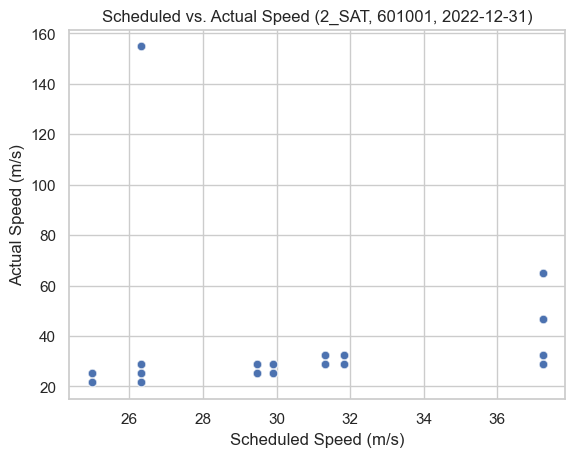

In [235]:
filtered_df['SPEED_DIFF'] = filtered_df['ACT_SPEED'] - filtered_df['SCHED_SPEED']

# Summary statistics
print(filtered_df[['ACT_SPEED', 'SCHED_SPEED', 'SPEED_DIFF']].describe())

# Scatter plot to check relationship
sns.scatterplot(x='SCHED_SPEED', y='ACT_SPEED', data=filtered_df, alpha=0.7)
plt.title("Scheduled vs. Actual Speed (2_SAT, 601001, 2022-12-31)")
plt.xlabel("Scheduled Speed (m/s)")
plt.ylabel("Actual Speed (m/s)")
plt.show()

In [115]:
threshold_130 = df_final['TIME_DIFF_ARR'].quantile(0.95)  # Top 5% delays
anomalies_130 = df_final[df_final['TIME_DIFF_ARR'] > threshold_130]
print("Anomalous Trips (SIGNID=130):")
print(anomalies_130[['EVENT_NO_TRIP', 'PATTERN', 'TIME_DIFF_ARR']])

Anomalous Trips (SIGNID=130):
       EVENT_NO_TRIP  PATTERN  TIME_DIFF_ARR
7967       996105011   601002          399.0
8761       996105011   601002          400.0
8741       996109895   601002          384.0
8679       996109895   601002          372.0
9377       996115201   601002          375.0
...              ...      ...            ...
55514     1025368504   601002          388.0
55638     1025368504   601002          372.0
55639     1025368504   601002          395.0
55508     1025368504   601002          455.0
55512     1025368504   601002          380.0

[3298 rows x 3 columns]


In [292]:
filtered_df2 = df_final[(df_final['SERVICEGROUPABBR'] == '3_SUNHOL') & (df_final['PATTERN'] == 601004) & (df_final["OPD_DATE"] == '2022-12-25')]

In [296]:
new_df2 = filtered_df2[filtered_df2["MISSED_TRIP"] == 1]

In [301]:
new_df2[new_df2["EVENT_NO_TRIP"] == 4667346].to_clipboard(index=False)

In [297]:
new_df["EVENT_NO_TRIP"].unique()

array([4667346, 4667350, 4667354, 4667358, 4667362, 4667366, 4667370,
       4667374])

In [300]:
for trip in new_df["EVENT_NO_TRIP"].unique():
    print(new_df[new_df["EVENT_NO_TRIP"]== trip]["EVENT_NO_TRIP"].unique())
    print(fn_HH24MM(new_df[new_df["EVENT_NO_TRIP"]== trip]["SCHED_START_TIME"].unique()))
    print(fn_HH24MM(new_df[new_df["EVENT_NO_TRIP"]== trip]["SCHED_END_TIME"].unique()))
    print(new_df[new_df["EVENT_NO_TRIP"]== trip]["EXCCOMBOID"].unique())


[4667346]
20:44:00
21:20:00
[nan]
[4667350]
19:13:00
19:49:00
[nan]
[4667354]
17:44:00
18:21:00
[nan]
[4667358]
16:12:00
16:51:00
[nan]
[4667362]
14:40:00
15:19:00
[nan]
[4667366]
13:09:00
13:47:00
[nan]
[4667370]
11:35:00
12:13:00
[nan]
[4667374]
10:01:00
10:39:00
[nan]


/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_40524/2204520493.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if math.isnan(time_sec):
/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_40524/2204520493.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hours = math.floor(time_sec / 3600)
/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_40524/2204520493.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  minutes = math.floor((ti

#### Time decomposition

In [247]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate dwell time by OPD_DATE
df_time_series_dwell = df_final.groupby('OPT_DATE')['DWELL_TIME'].mean()

# Perform decomposition
decomposition = seasonal_decompose(df_time_series_dwell, model='additive', period=7)  # Assuming weekly seasonality

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [246]:
df_time_series_dwell

Hour
0.0     11.386949
1.0      7.847534
2.0     14.791209
3.0      0.000000
4.0      2.820819
5.0     12.163812
6.0     15.832588
7.0     20.041848
8.0     22.758842
9.0     21.504154
10.0    23.337957
11.0    26.062664
12.0    27.847625
13.0    27.518773
14.0    27.823378
15.0    27.887398
16.0    28.693582
17.0    27.241335
18.0    24.001983
19.0    22.514498
20.0    20.261712
21.0    19.908491
22.0    16.846577
23.0    14.547107
Name: DWELL_TIME, dtype: float64

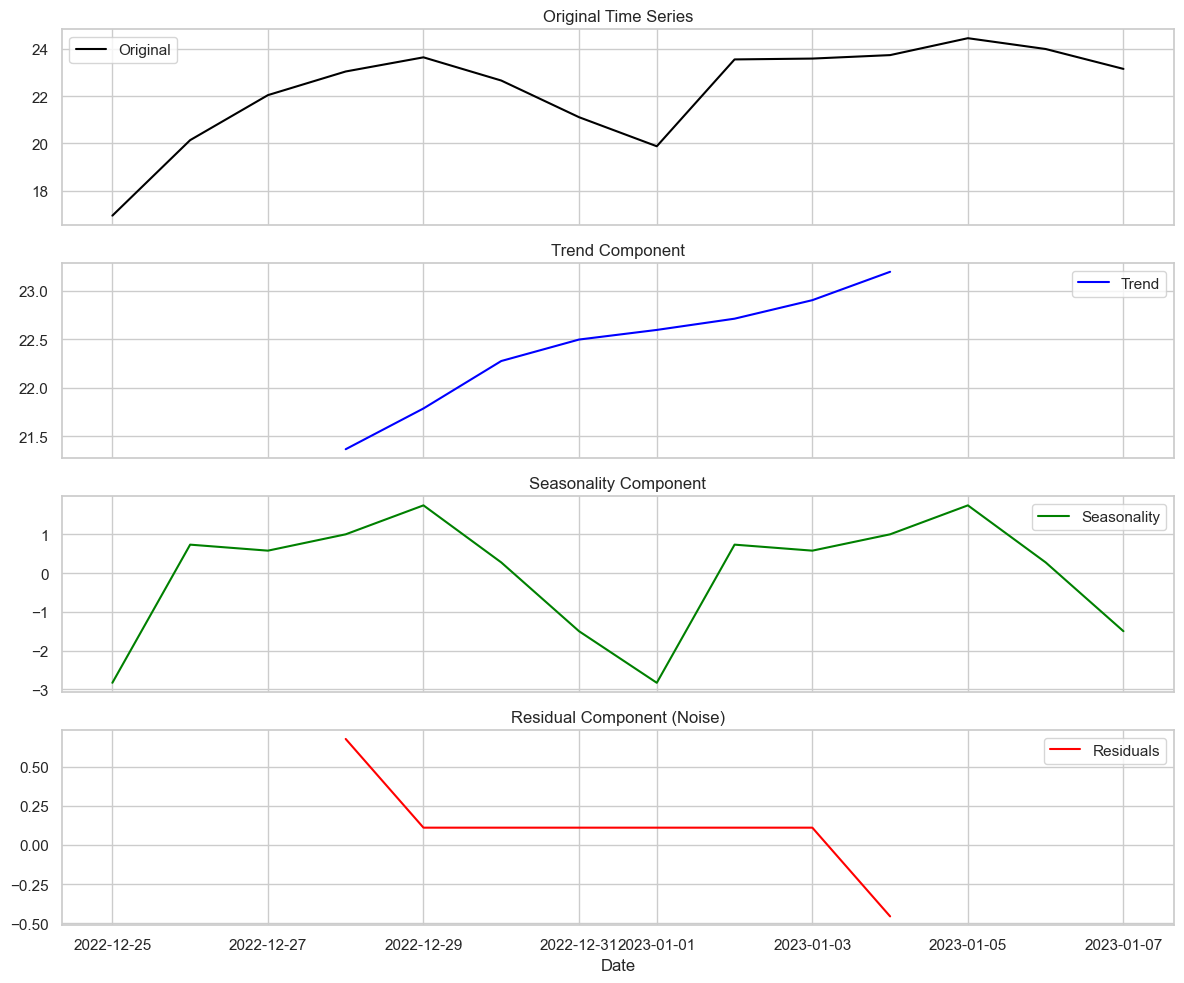

In [239]:
# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Original Data
axes[0].plot(df_time_series_dwell, label='Original', color='black')
axes[0].set_title('Original Time Series')
axes[0].legend()

# Trend Component
axes[1].plot(decomposition.trend, label='Trend', color='blue')
axes[1].set_title('Trend Component')
axes[1].legend()

# Seasonal Component
axes[2].plot(decomposition.seasonal, label='Seasonality', color='green')
axes[2].set_title('Seasonality Component')
axes[2].legend()

# Residual Component (Noise)
axes[3].plot(decomposition.resid, label='Residuals', color='red')
axes[3].set_title('Residual Component (Noise)')
axes[3].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

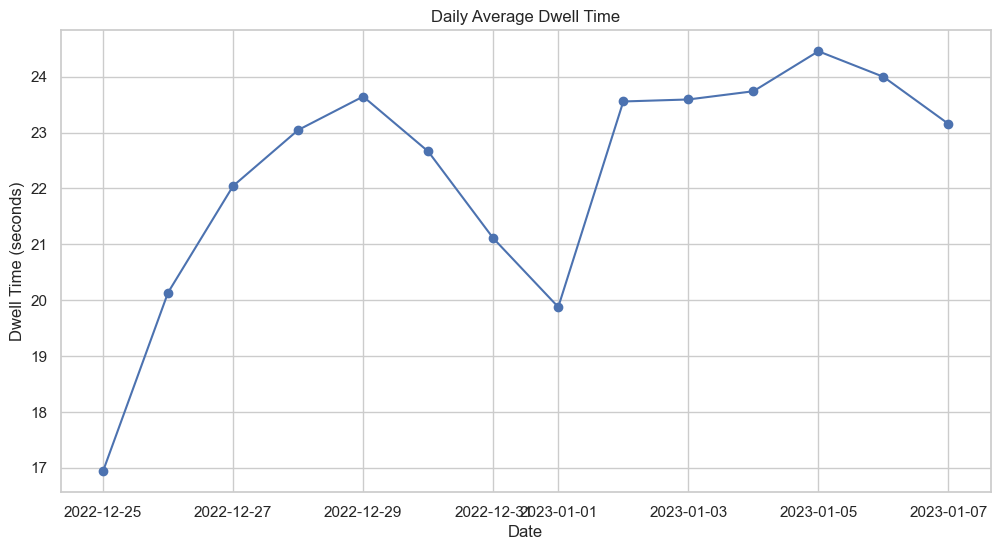

In [238]:
plt.figure(figsize=(12, 6))
plt.plot(df_time_series_dwell, marker='o', linestyle='-')
plt.title('Daily Average Dwell Time')
plt.xlabel('Date')
plt.ylabel('Dwell Time (seconds)')
plt.grid(True)
plt.show()

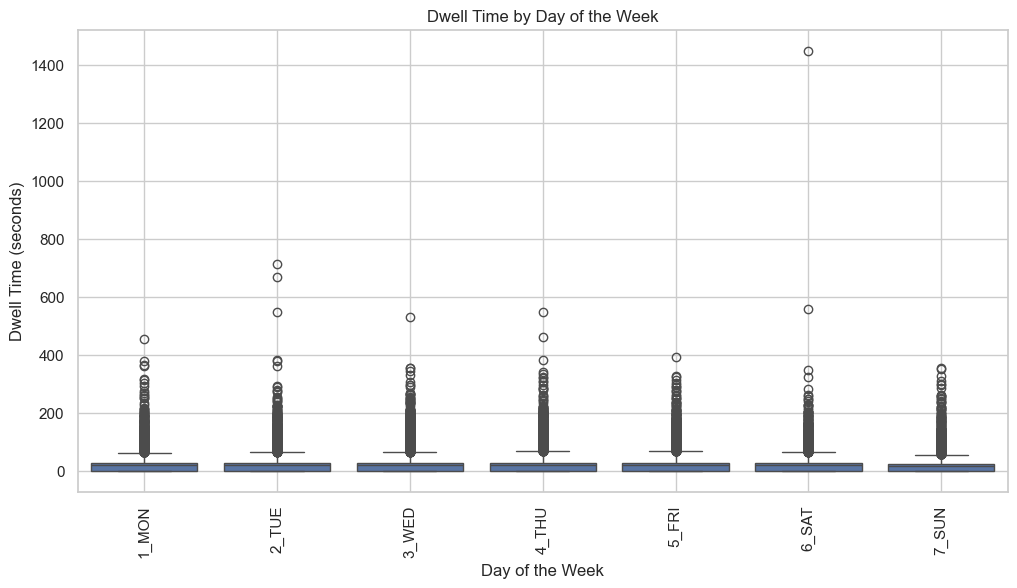

In [242]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='WEEKDAY', y='DWELL_TIME', data=df_final, order=['1_MON', '2_TUE', '3_WED', '4_THU', '5_FRI', '6_SAT', '7_SUN'])
plt.title('Dwell Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Dwell Time (seconds)')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.grid(True)
plt.show()

In [241]:
df_final["WEEKDAY"].unique()

array(['6_SAT', '7_SUN', '1_MON', '2_TUE', '3_WED', '4_THU', '5_FRI'],
      dtype=object)

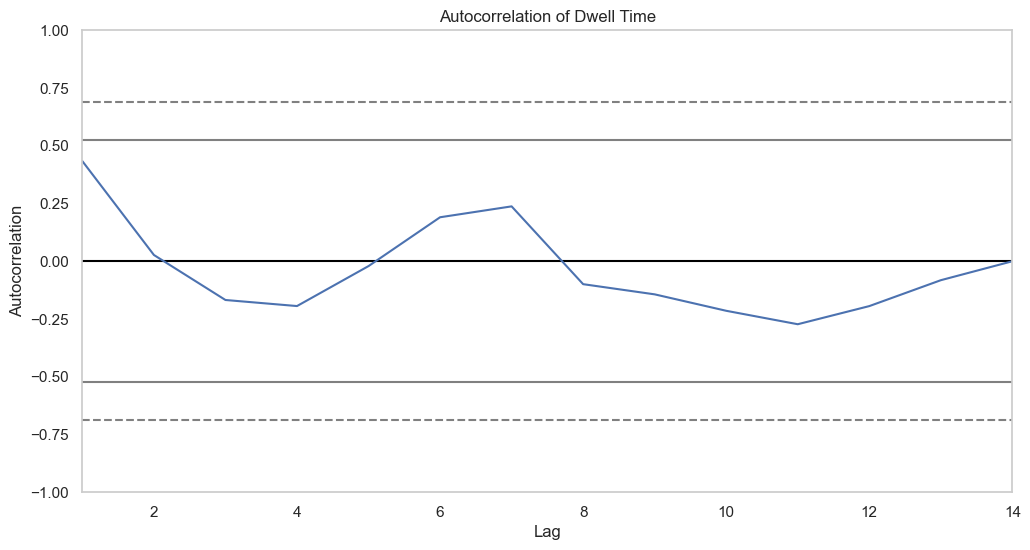

In [243]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(12, 6))
autocorrelation_plot(df_time_series_dwell)
plt.title('Autocorrelation of Dwell Time')
plt.show()

In [322]:
## doors_opening = 0 is invalid data
# actual speed = actual distance / actual trip time
